# Análise exploratória

In [16]:
import sys
import os

# Obtém o diretório atual onde o Jupyter está rodando
current_dir = os.getcwd()
# Sobe três níveis para chegar na raiz do projeto
project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))

# Adiciona a raiz ao caminho de busca do Python se ela ainda não estiver lá
if project_root not in sys.path:
    sys.path.append(project_root)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from configs.log_config import logger

## Verificando os dados no geral

In [18]:
df = pd.read_csv('../../../docs/planilhas_completas/data_actions_energy_1year.csv')
print(df.head())

                        Date       Open       High        Low      Close  \
0  2024-12-02 00:00:00-03:00  25.705663  25.920031  25.165080  25.910711   
1  2024-12-03 00:00:00-03:00  26.078478  26.190321  25.407409  25.612457   
2  2024-12-04 00:00:00-03:00  25.370127  25.668379  25.230322  25.388767   
3  2024-12-05 00:00:00-03:00  25.519254  25.808186  25.472652  25.528574   
4  2024-12-06 00:00:00-03:00  25.519256  25.864110  25.314206  25.659061   

    Volume  Dividends  Stock Splits     Ticker  
0  4578704        0.0           0.0  ALUP11.SA  
1  1457040        0.0           0.0  ALUP11.SA  
2   757224        0.0           0.0  ALUP11.SA  
3   559312        0.0           0.0  ALUP11.SA  
4  1375192        0.0           0.0  ALUP11.SA  


* Verificando como as colunas e os tipos de dados estão

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5254 non-null   object 
 1   Open          5254 non-null   float64
 2   High          5254 non-null   float64
 3   Low           5254 non-null   float64
 4   Close         5254 non-null   float64
 5   Volume        5254 non-null   int64  
 6   Dividends     5254 non-null   float64
 7   Stock Splits  5254 non-null   float64
 8   Ticker        5254 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 369.6+ KB


* Contando a frequência de cada ação na base de dados

In [20]:
frequency_actions = df['Ticker'].value_counts()
print(frequency_actions)

Ticker
ALUP11.SA    251
AURE3.SA     251
AXIA3.SA     251
AXIA6.SA     251
BRAV3.SA     251
CMIG4.SA     251
CPFE3.SA     251
CSAN3.SA     251
EGIE3.SA     251
ENGI11.SA    251
ENEV3.SA     251
EQTL3.SA     251
LIGT3.SA     251
RAIZ4.SA     251
NEOE3.SA     251
PETR4.SA     251
PRIO3.SA     251
TAEE11.SA    251
RECV3.SA     251
VBBR3.SA     251
CPLE6.SA     234
Name: count, dtype: int64


* Analisando os dados das colunas númericas

In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5254.000000,5254.000000,5254.000000,5254.000000,5.254000e+03,5254.000000,5254.000000
mean,23.351106,23.639323,23.091058,23.366840,8.728154e+06,0.006280,0.001087
std,13.483471,13.620370,13.373609,13.510692,1.173857e+07,0.085845,0.035453
min,0.810000,0.820000,0.810000,0.810000,0.000000e+00,0.000000,0.000000
25%,11.012385,11.150000,10.840729,11.010000,1.699750e+06,0.000000,0.000000
50%,24.198002,24.476333,23.969689,24.233432,5.447550e+06,0.000000,0.000000
75%,34.145473,34.510650,33.808363,34.170111,1.102311e+07,0.000000,0.000000
max,66.809998,68.000000,66.360001,67.320000,2.261489e+08,2.078419,1.400000


## Plot de gráficos para cada ação

* **Gráfico de linha e colunas**: verificar outliers (picos em um dia que diminiu no próximo dia ou que não mantenham um padrão) que precisam ser removidos.
* **Histograma**: Verificamos como está o comportamento da linha, se ele mantem curva Gaussiana (formato de sino) ou tem caudas gordas, sendo nescessario a adição de Dropout para evitar o overfitting.
* **Heatmap**: Procuramos verificar como está a correlação das colunas ***Open***, ***Close***, ***High*** e ***Low***, caso estejam em correlação 1.00 ou 0.99, consideramos usar somente o ***Close*** ou calculamos a diferença entre eles, pois seria a utilização de dados redudantes se usassemos as outras features e geraria custo computacional ao nosso modelo.


Analisando Ticker: ALUP11.SA


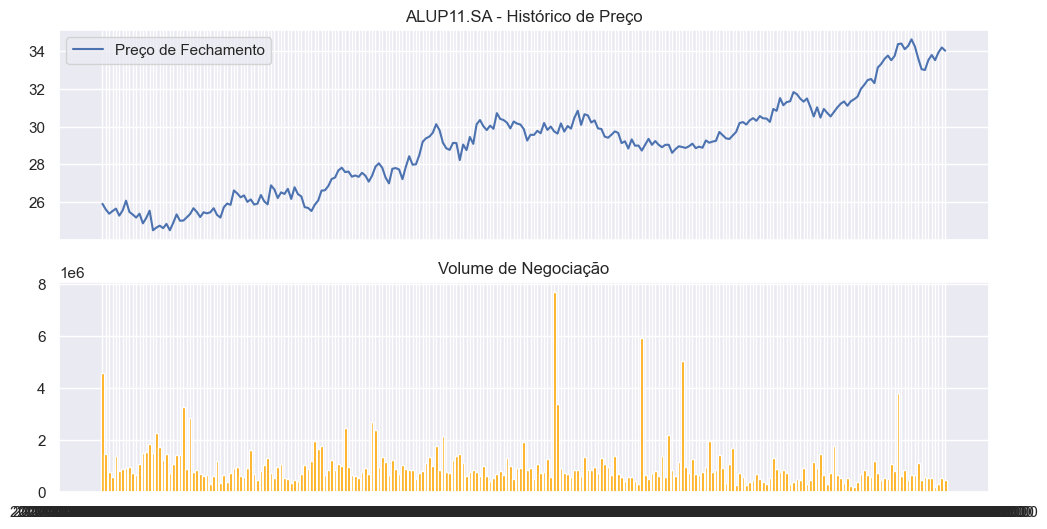

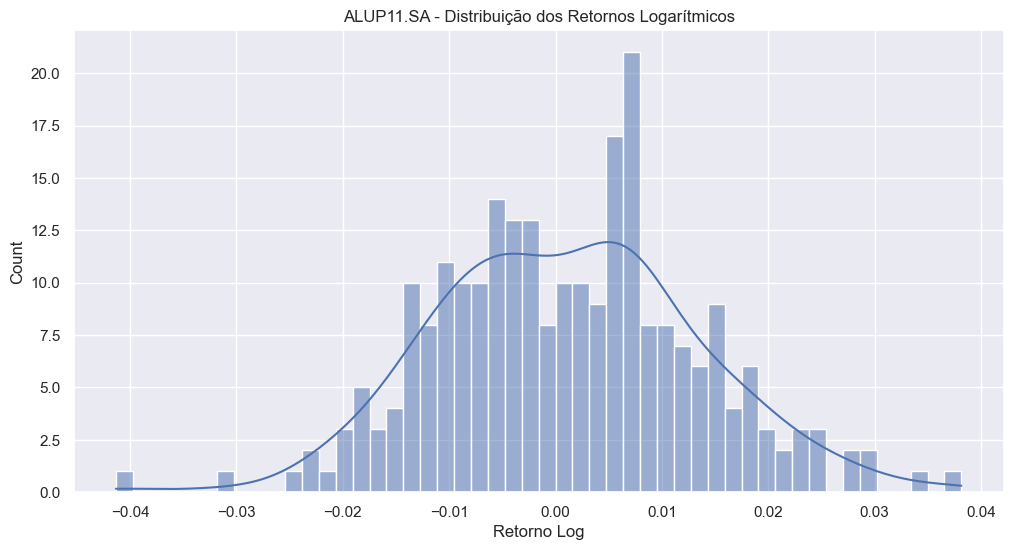

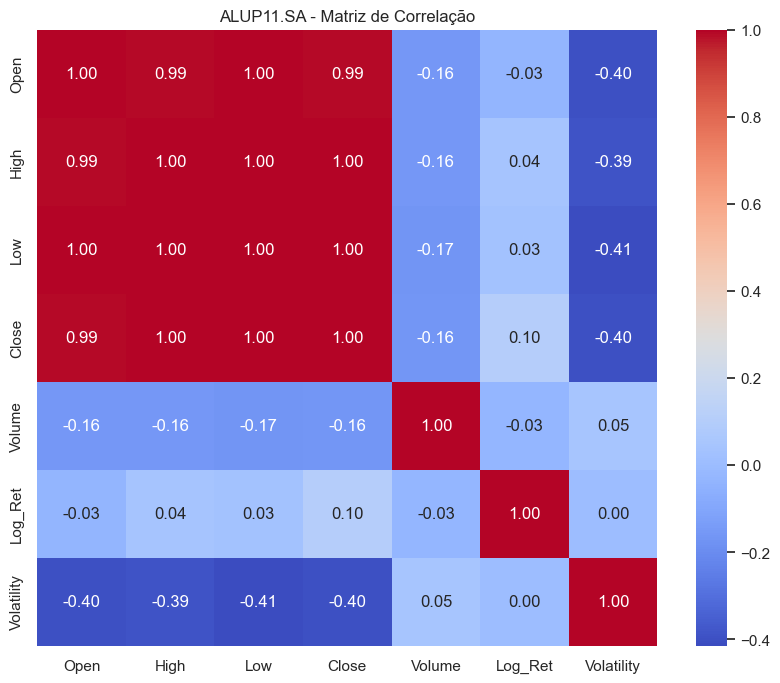


Analisando Ticker: AURE3.SA


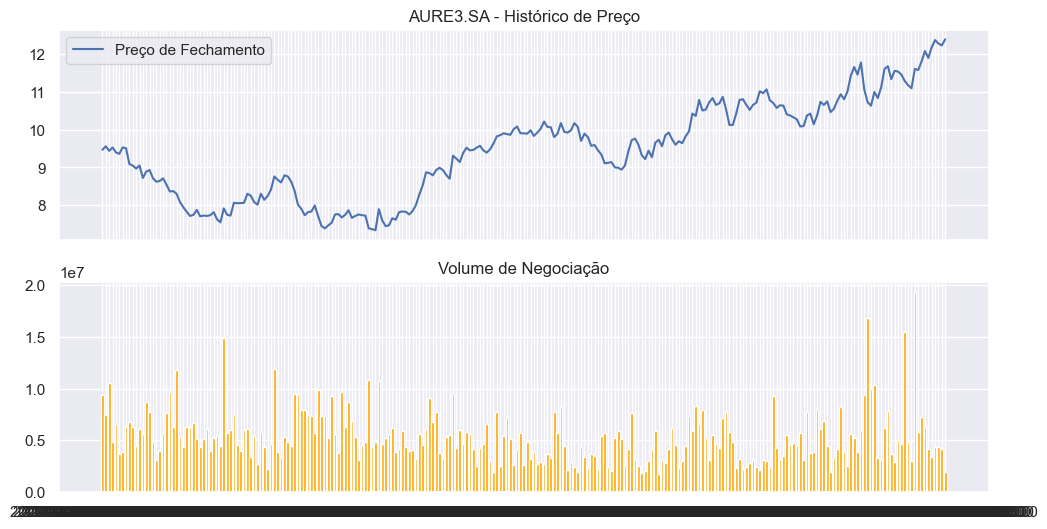

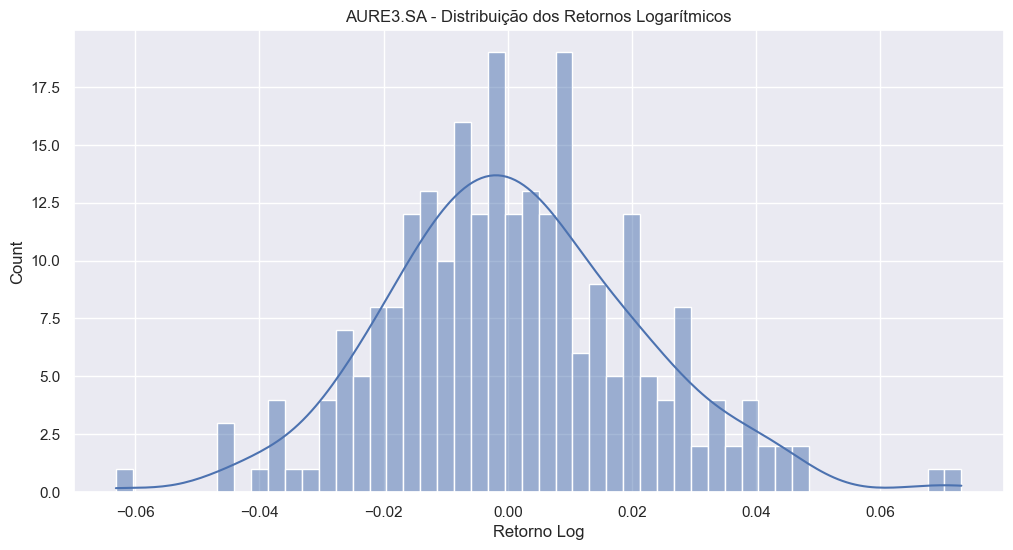

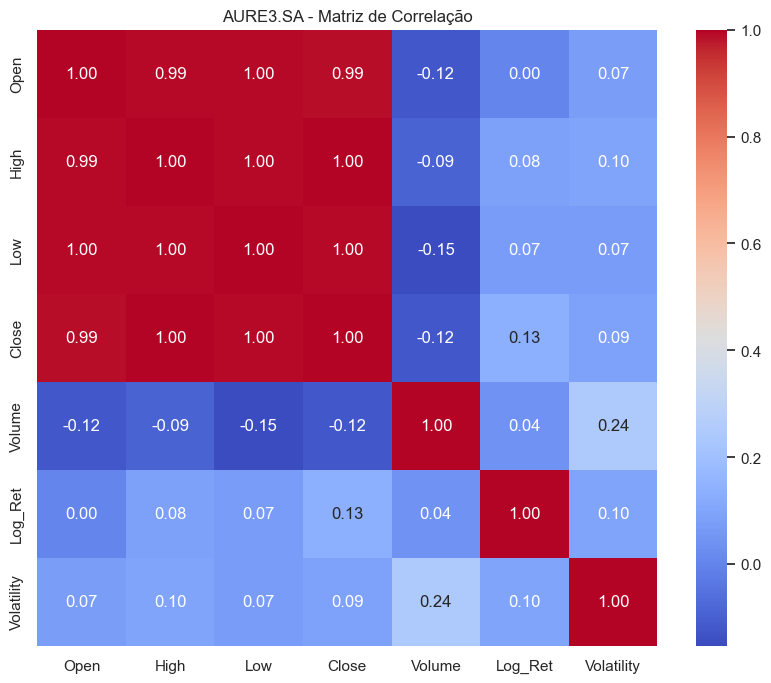


Analisando Ticker: AXIA3.SA


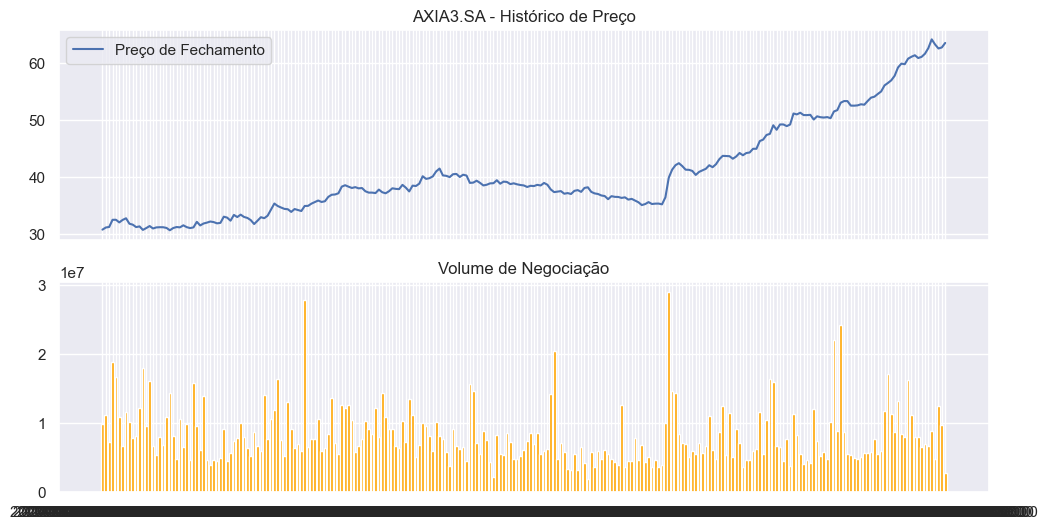

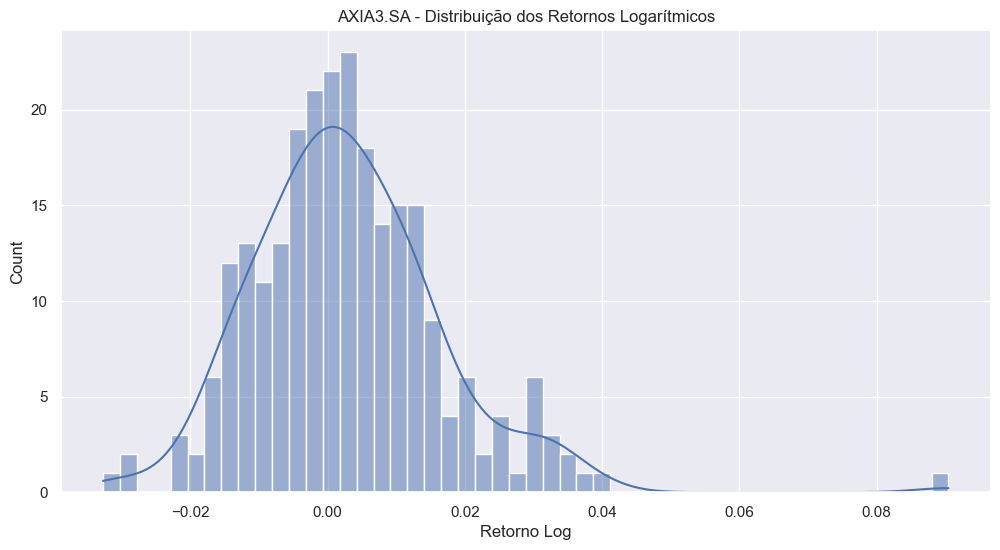

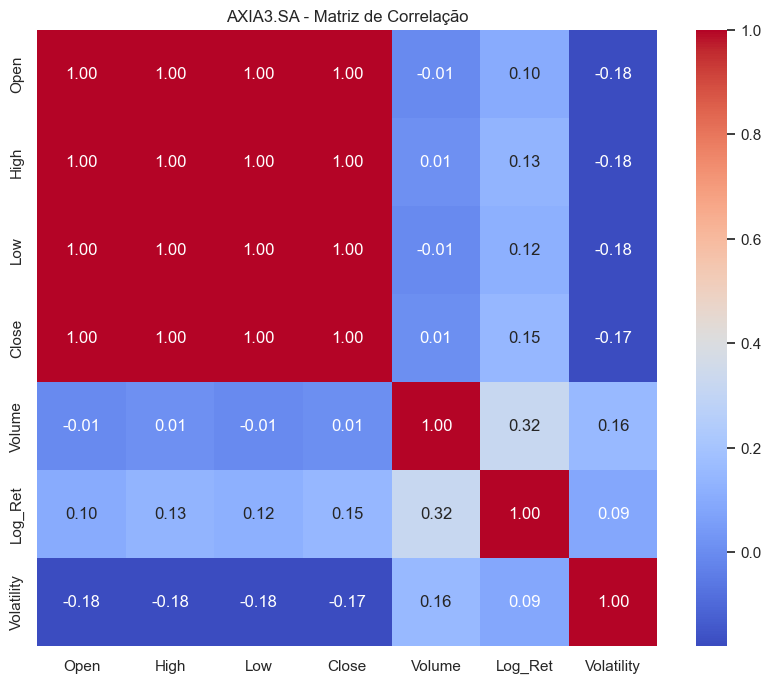


Analisando Ticker: AXIA6.SA


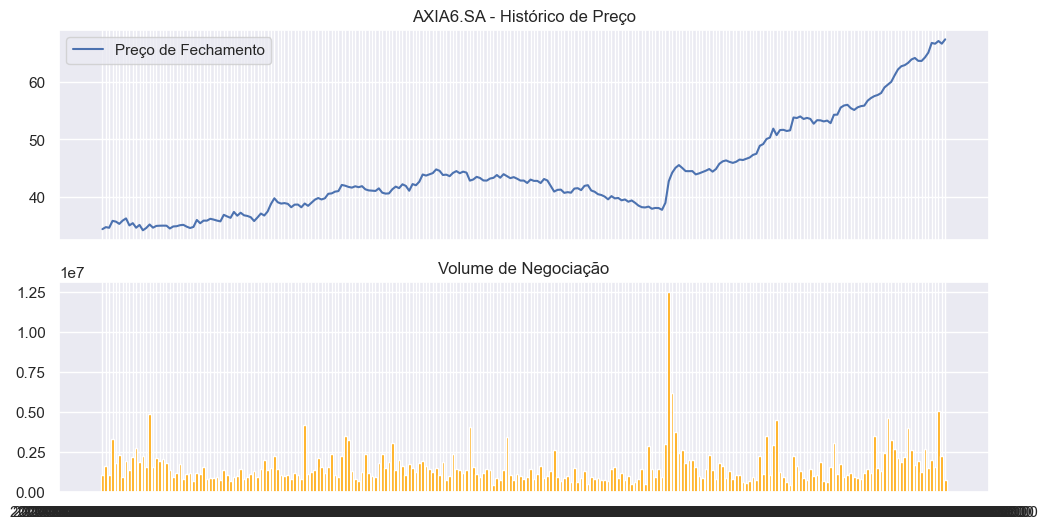

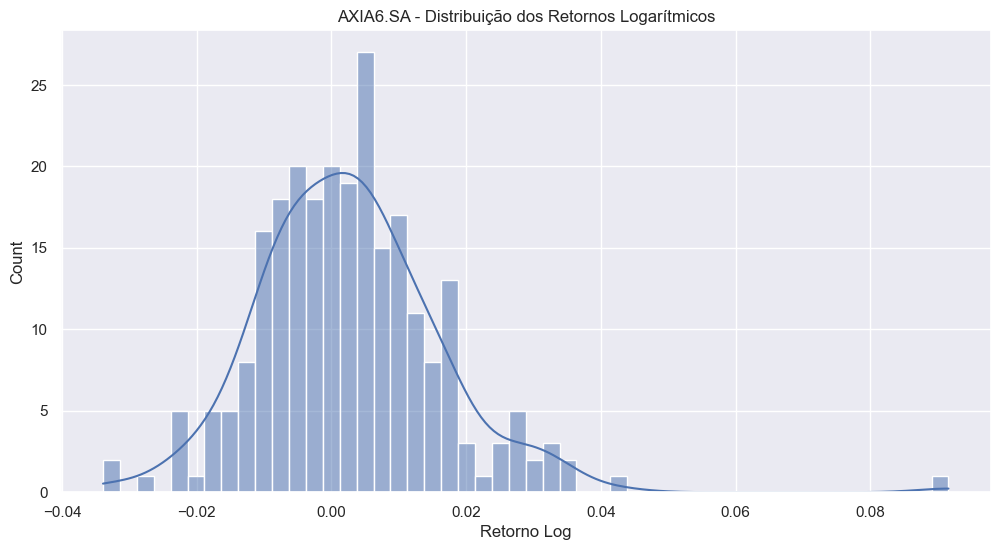

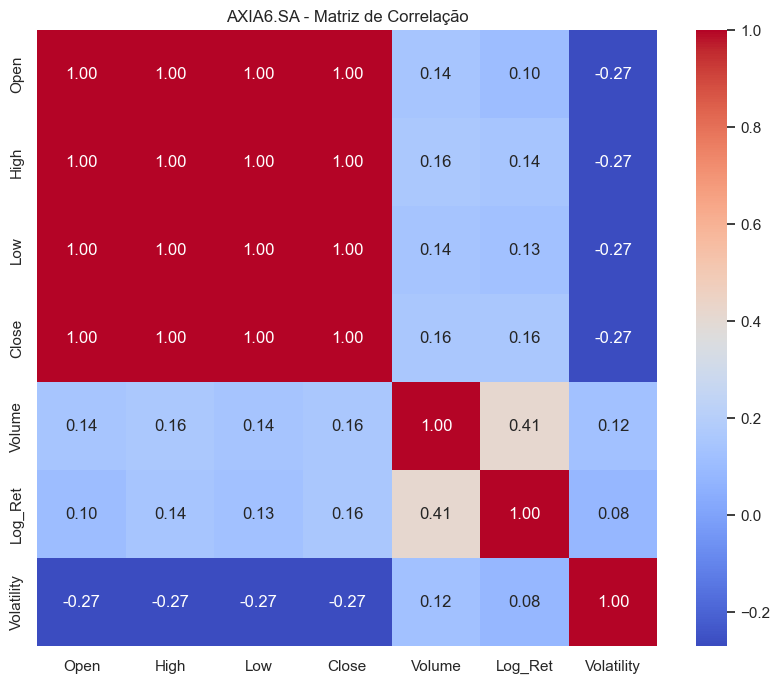


Analisando Ticker: BRAV3.SA


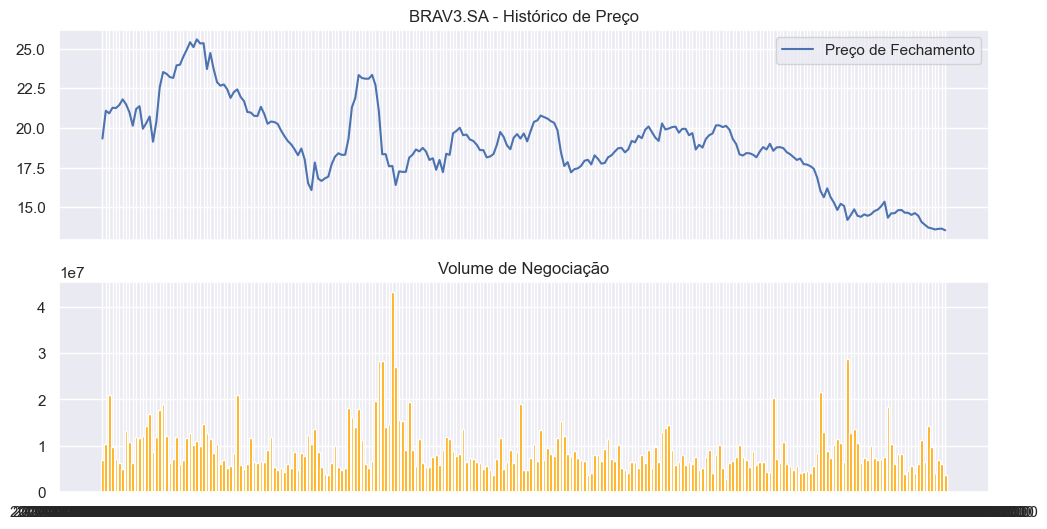

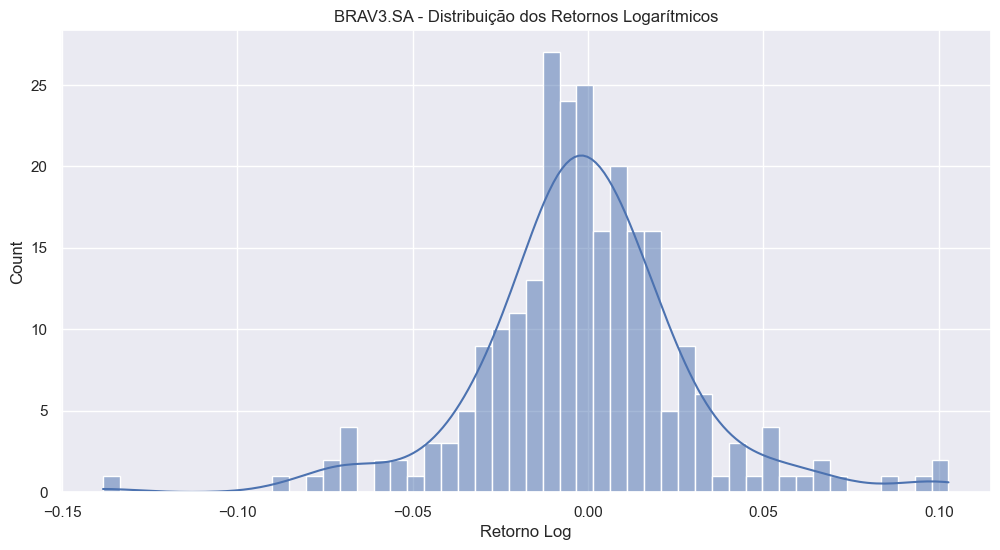

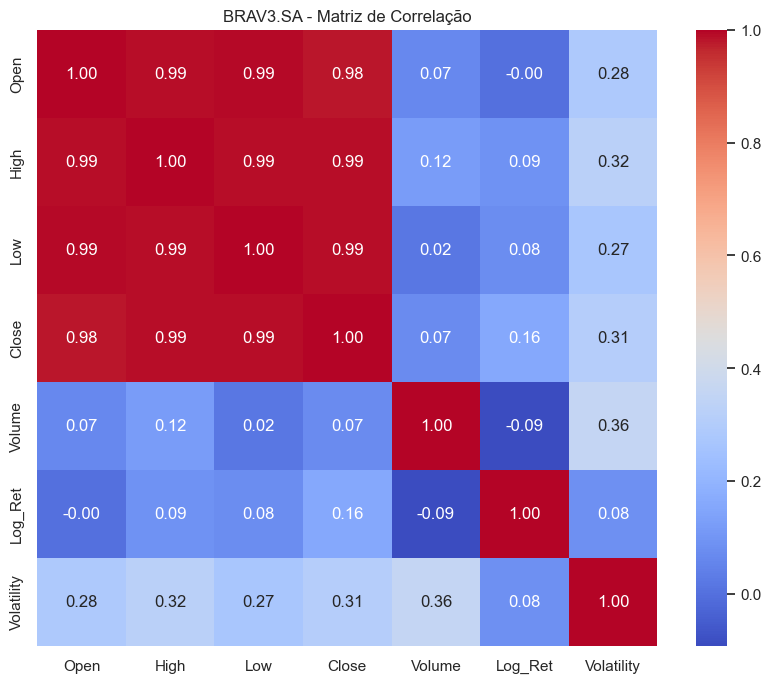


Analisando Ticker: CMIG4.SA


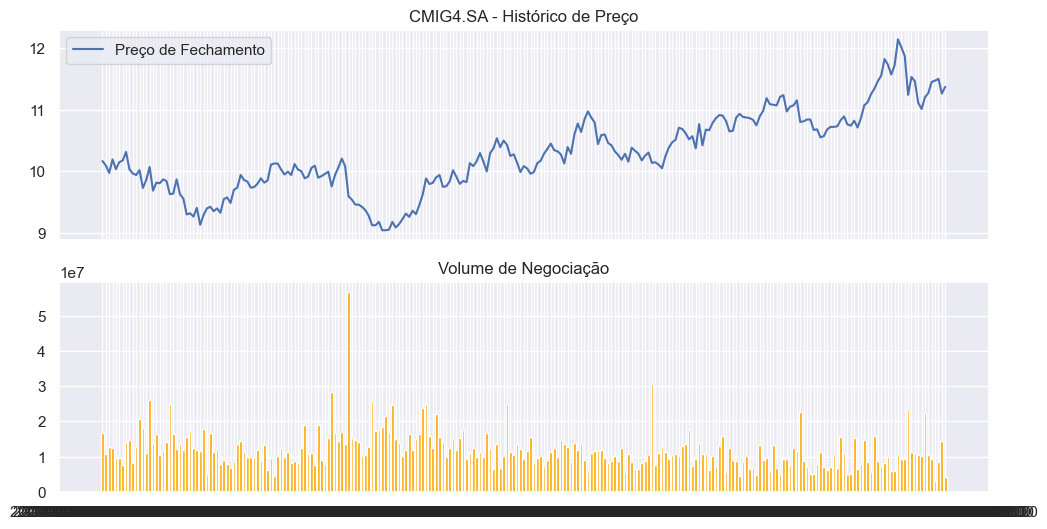

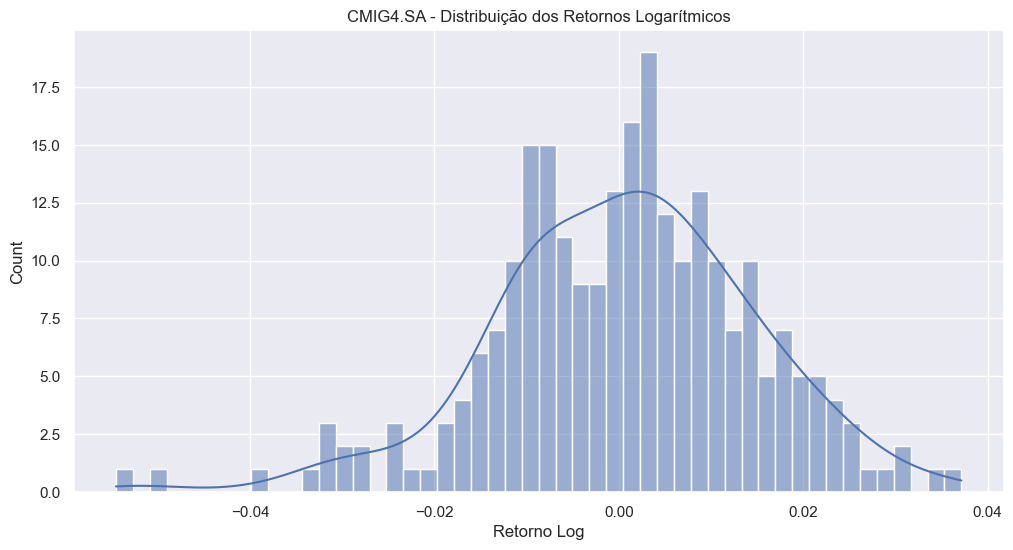

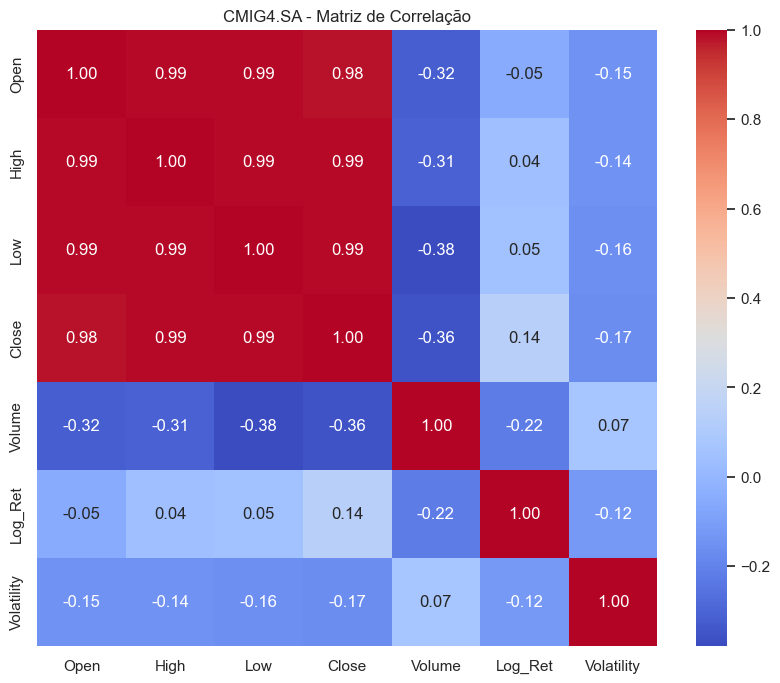


Analisando Ticker: CPFE3.SA


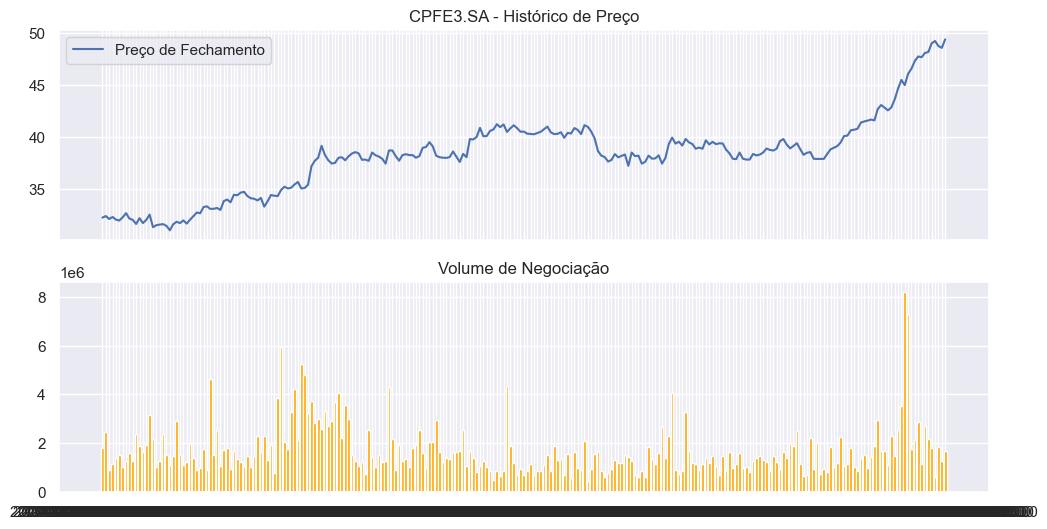

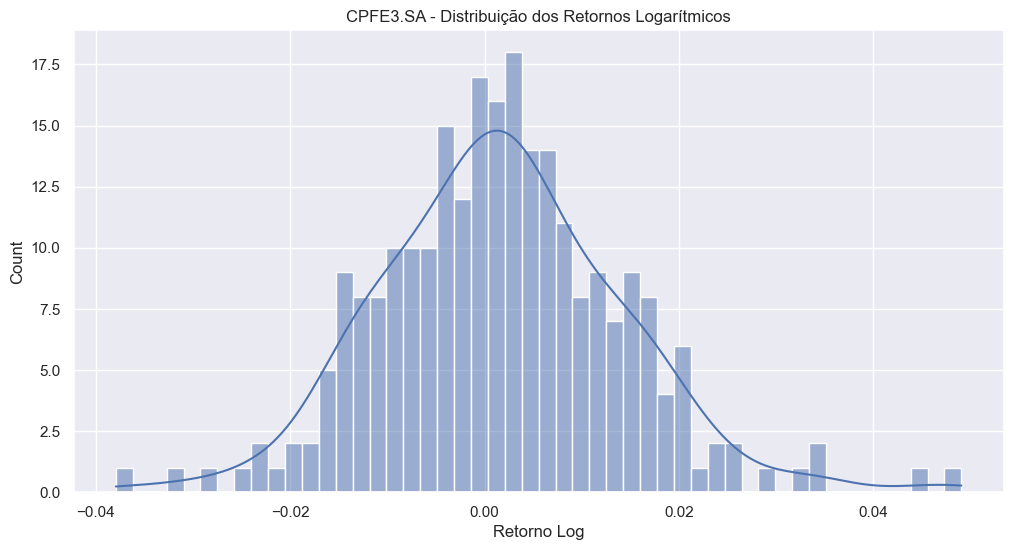

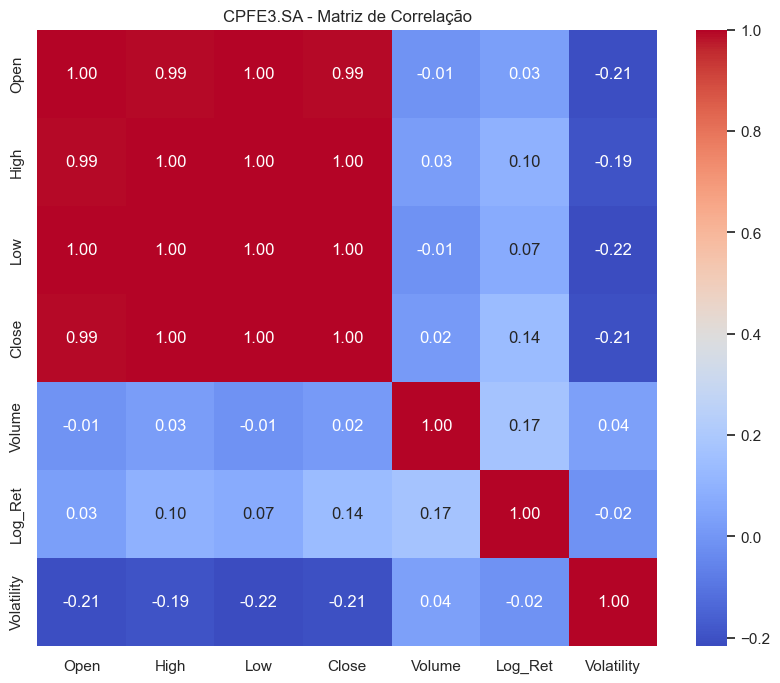


Analisando Ticker: CPLE6.SA


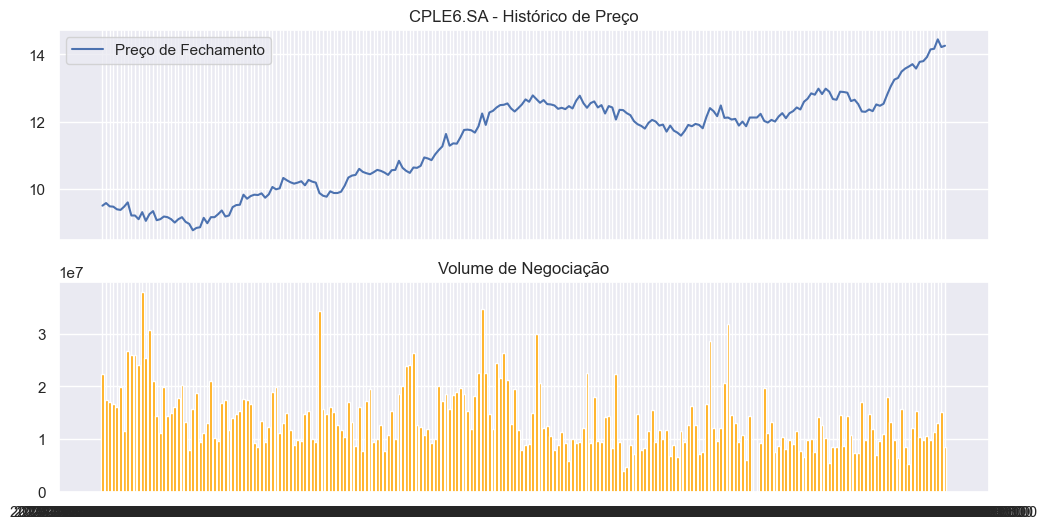

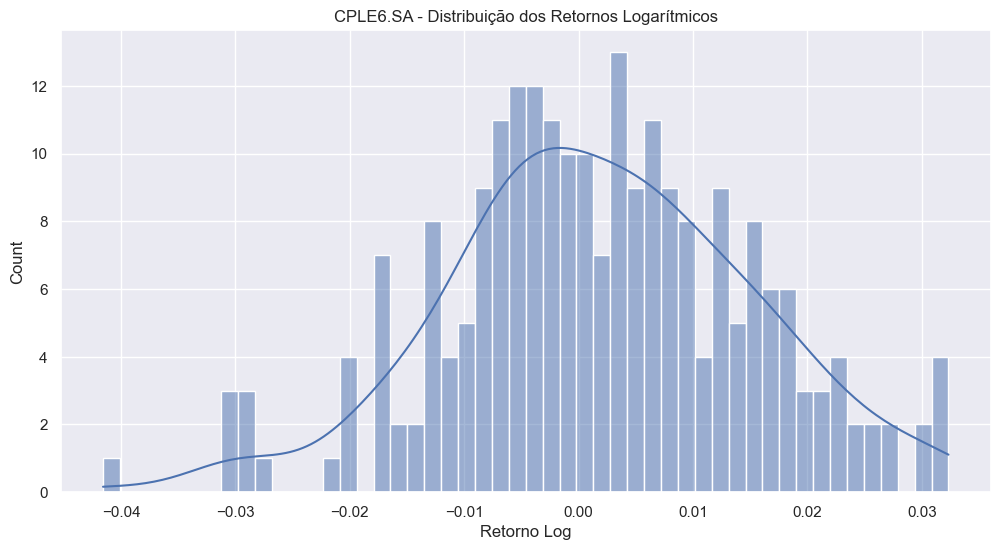

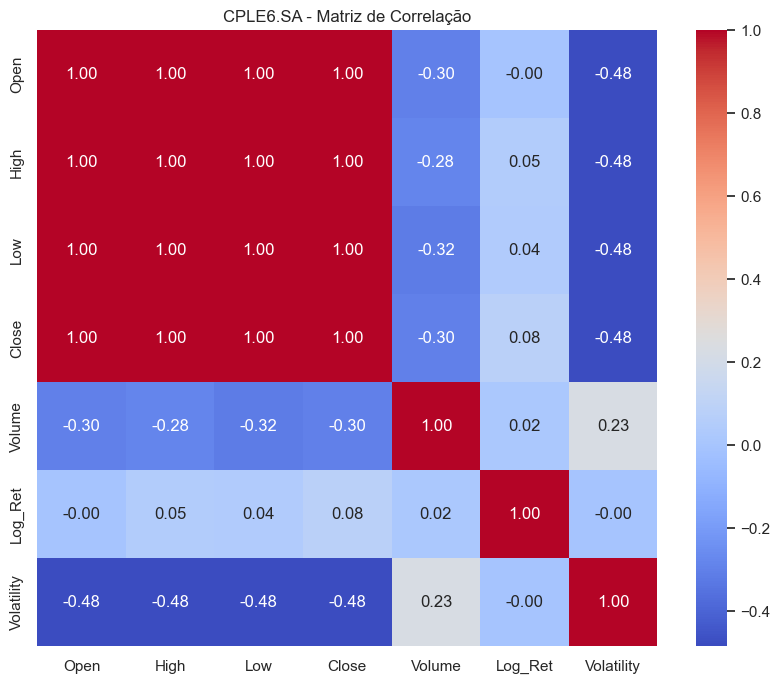


Analisando Ticker: CSAN3.SA


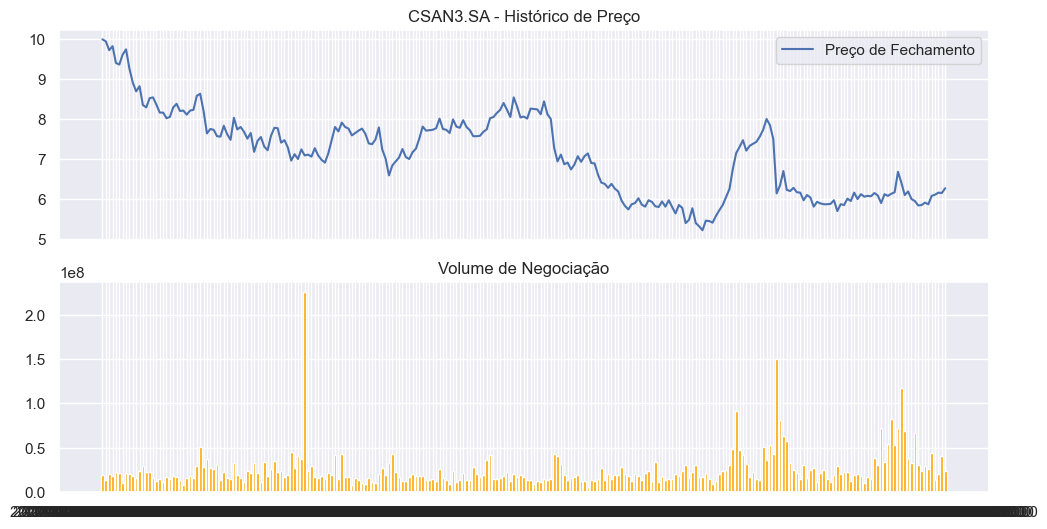

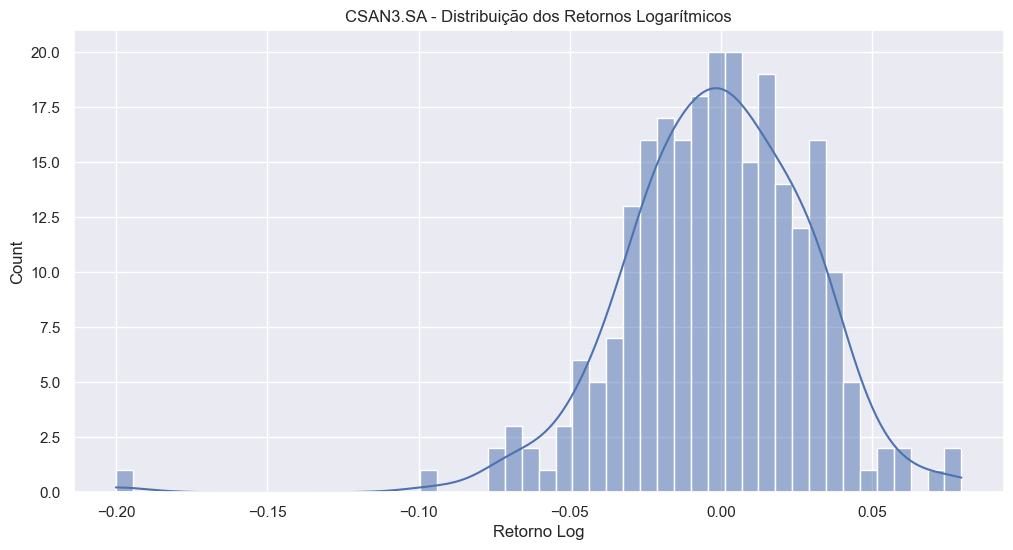

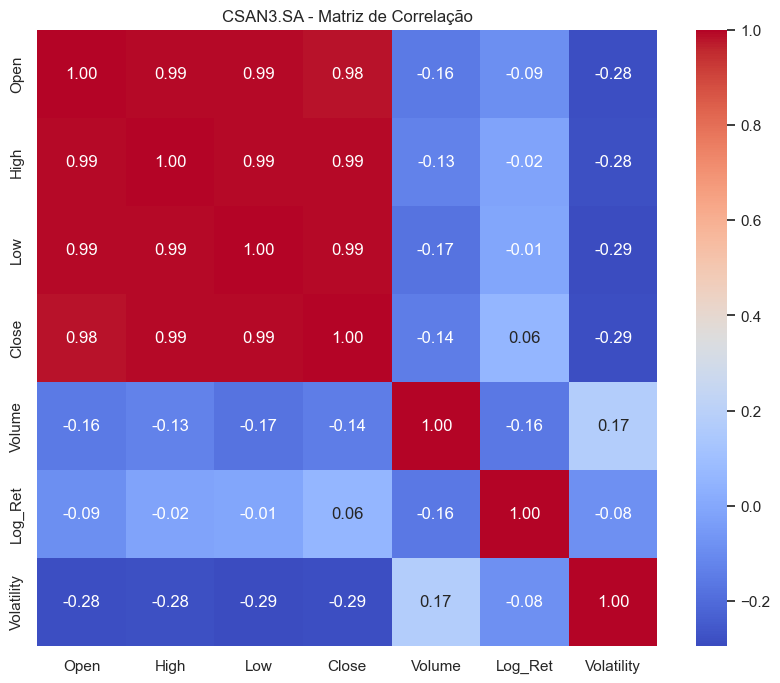


Analisando Ticker: EGIE3.SA


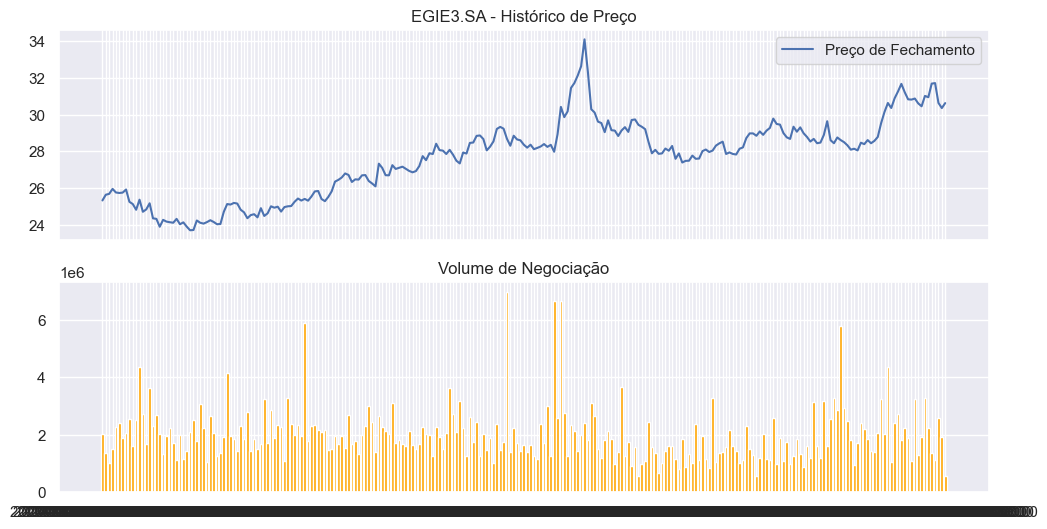

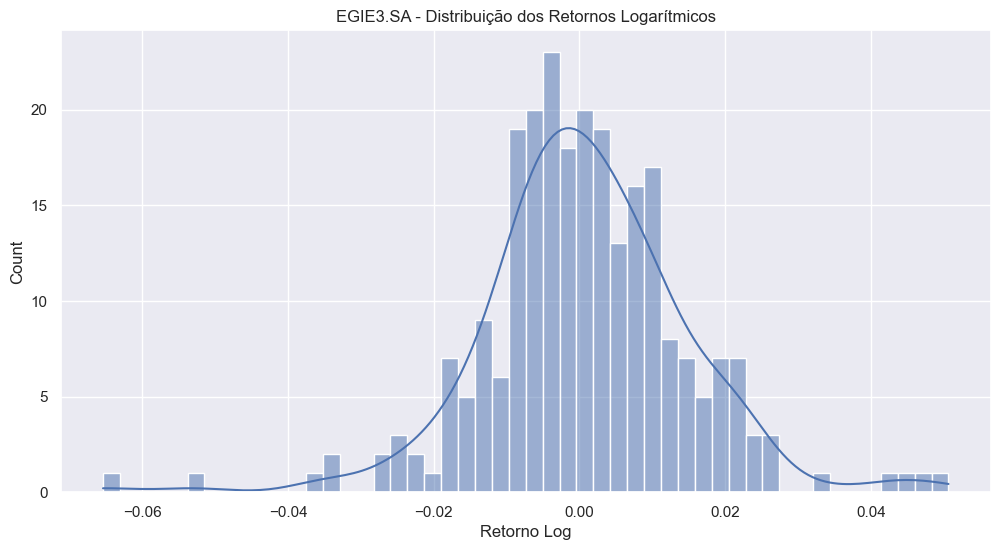

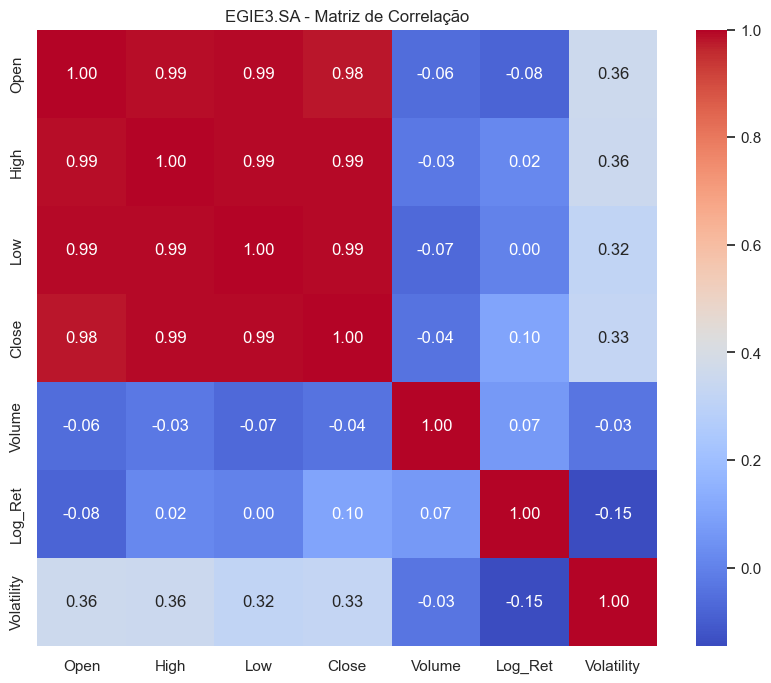


Analisando Ticker: ENEV3.SA


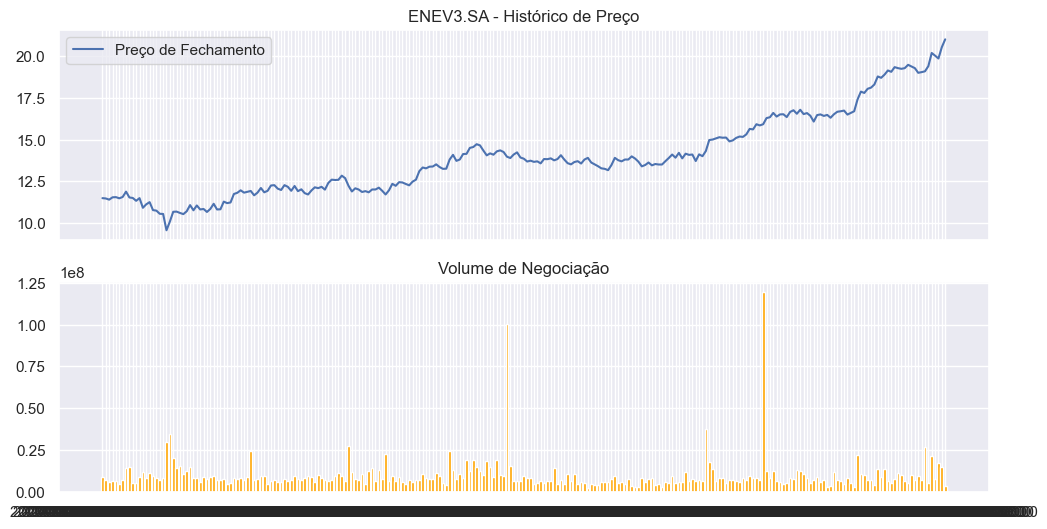

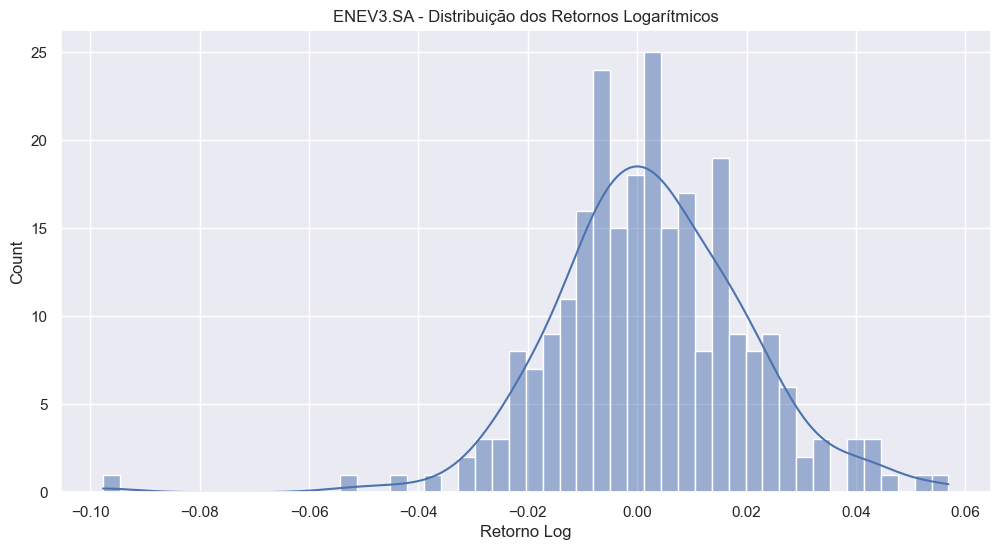

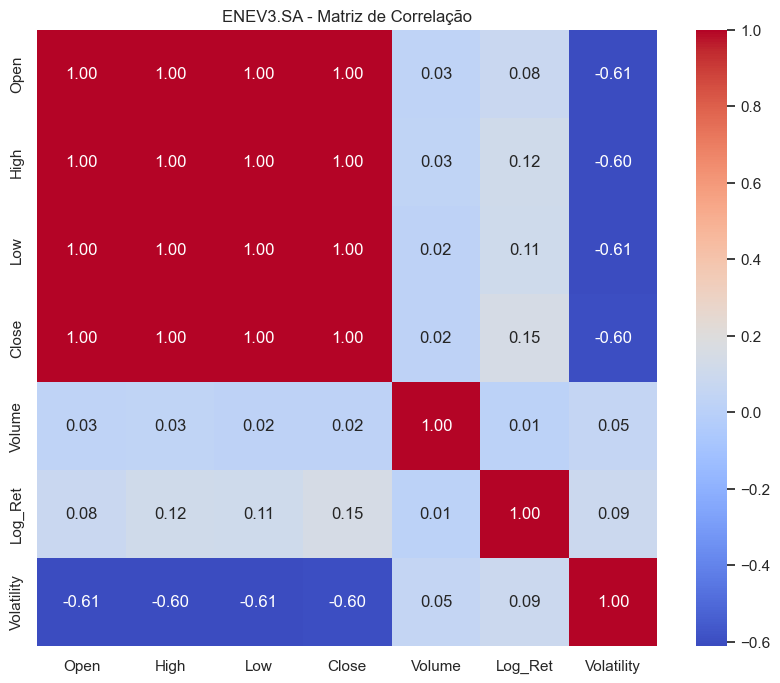


Analisando Ticker: ENGI11.SA


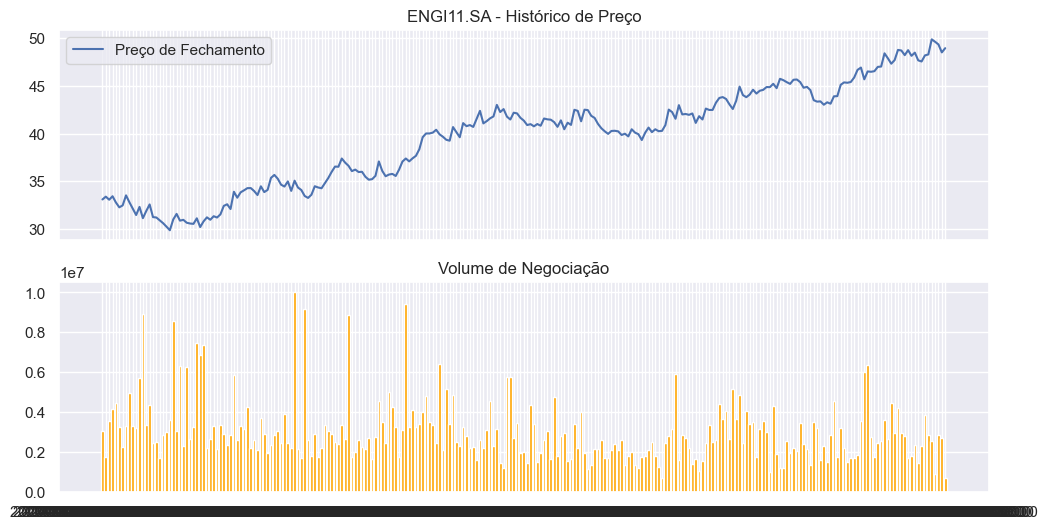

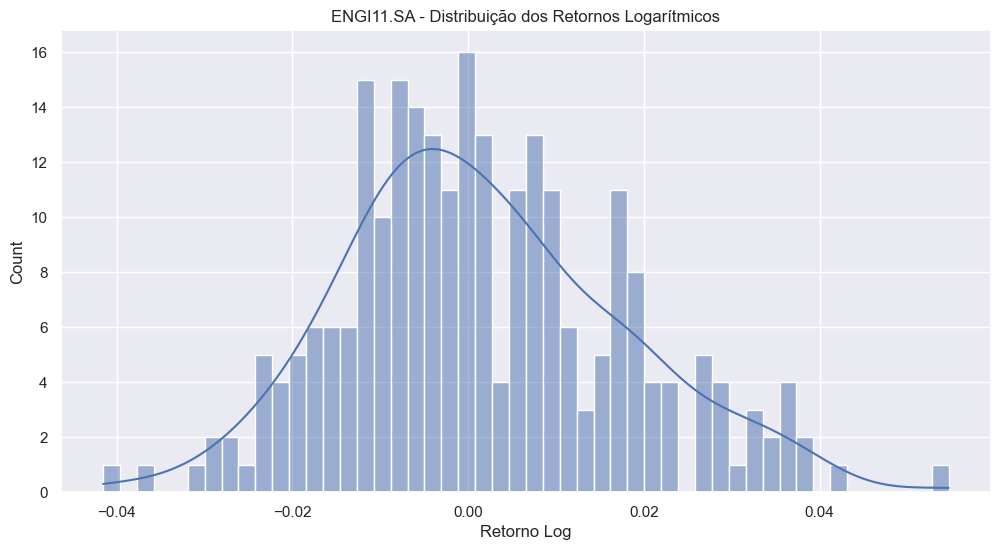

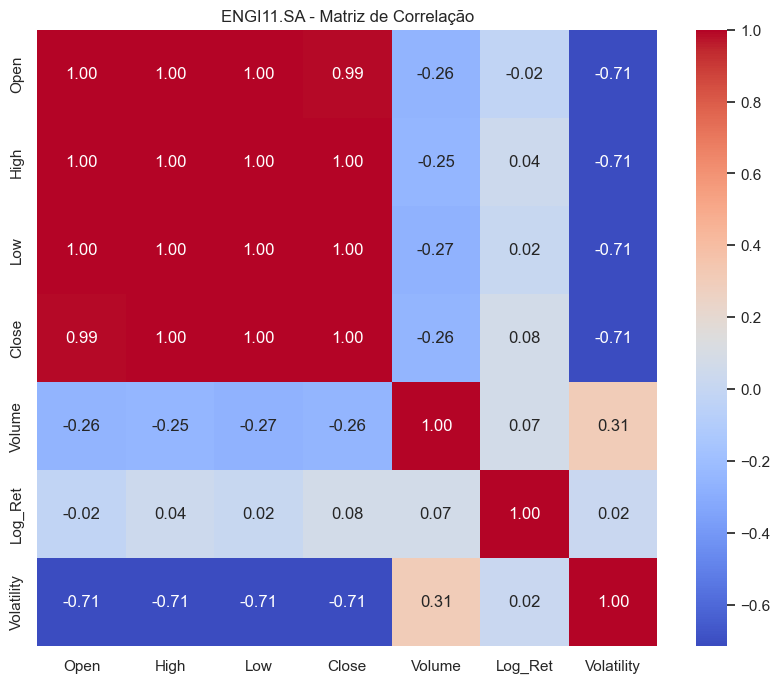


Analisando Ticker: EQTL3.SA


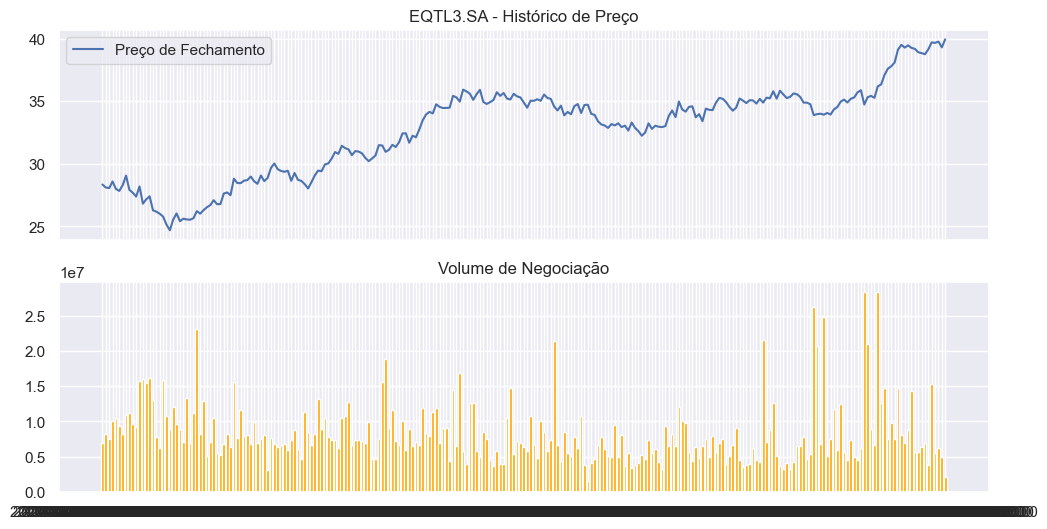

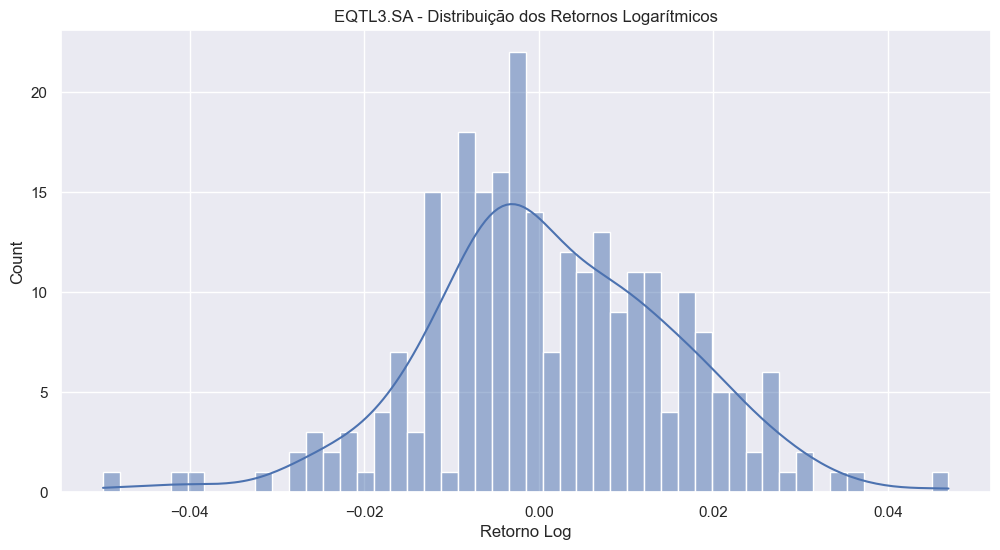

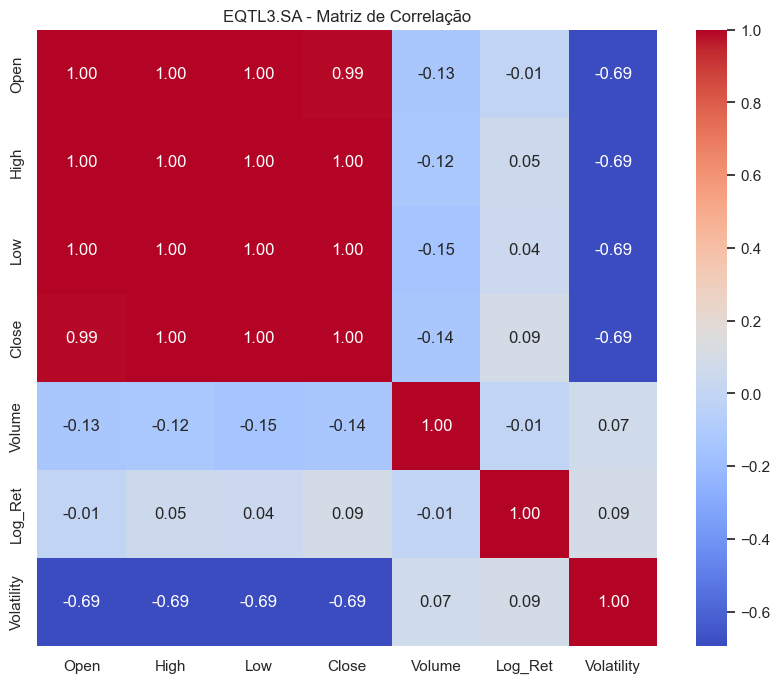


Analisando Ticker: LIGT3.SA


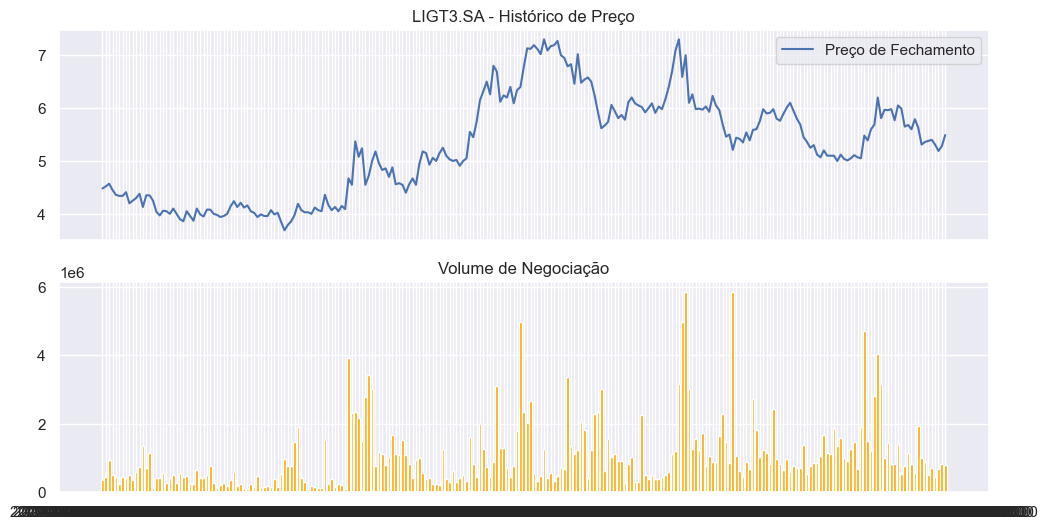

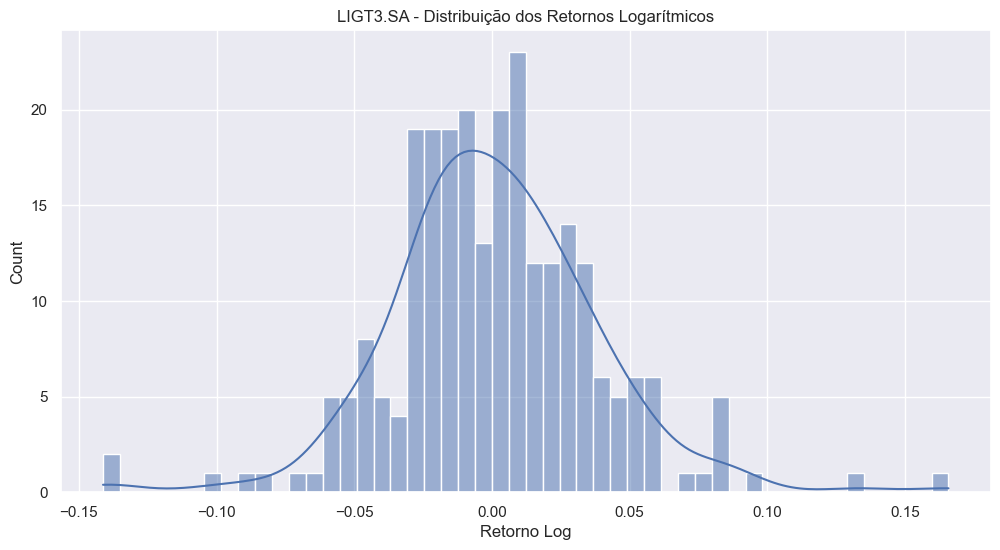

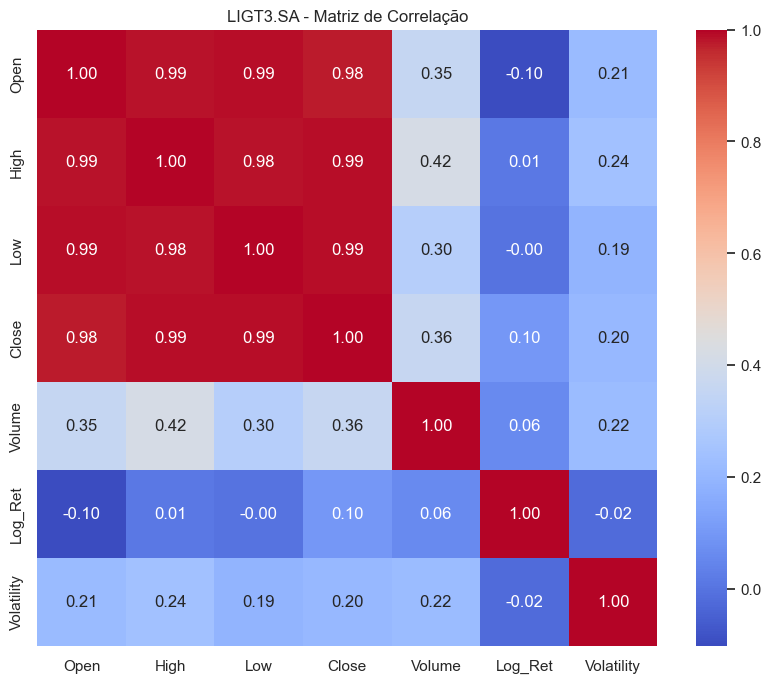


Analisando Ticker: NEOE3.SA


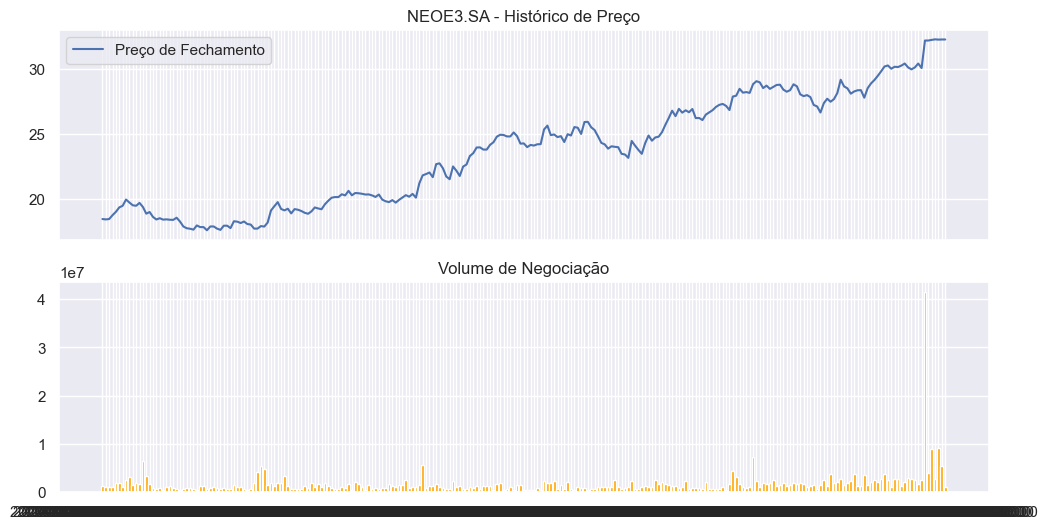

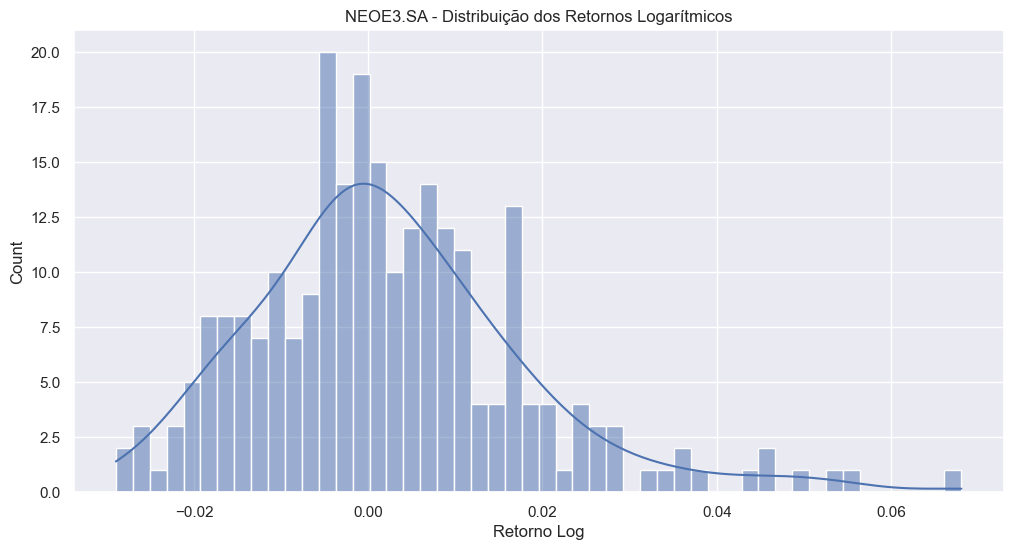

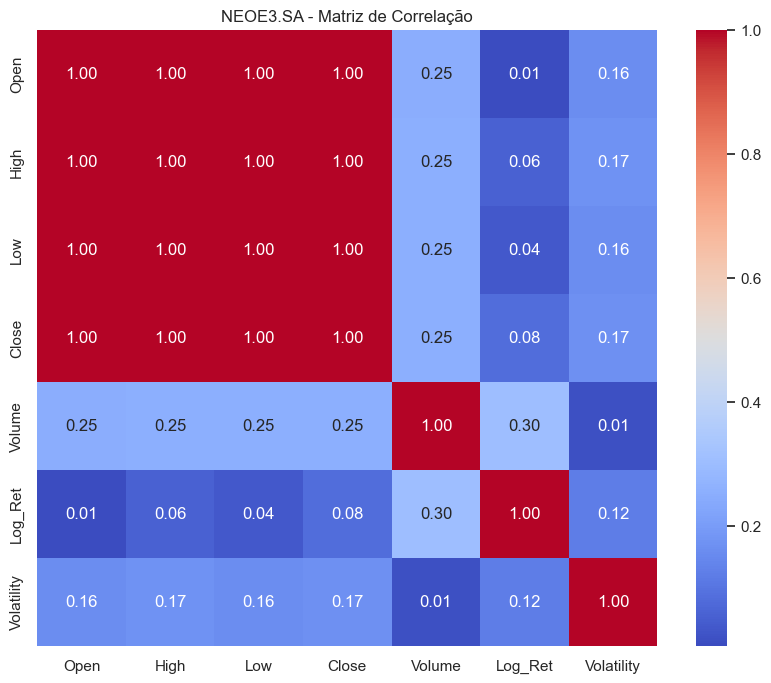


Analisando Ticker: PETR4.SA


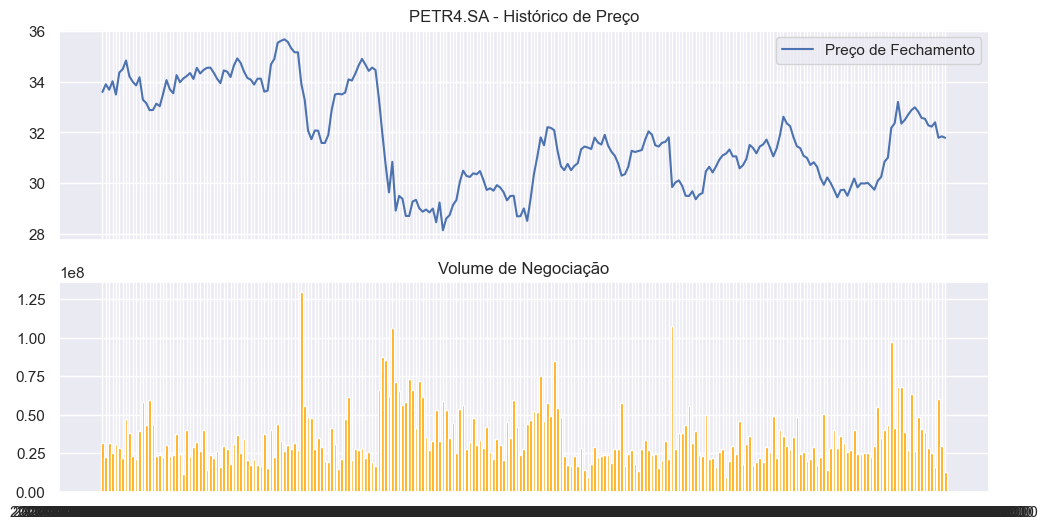

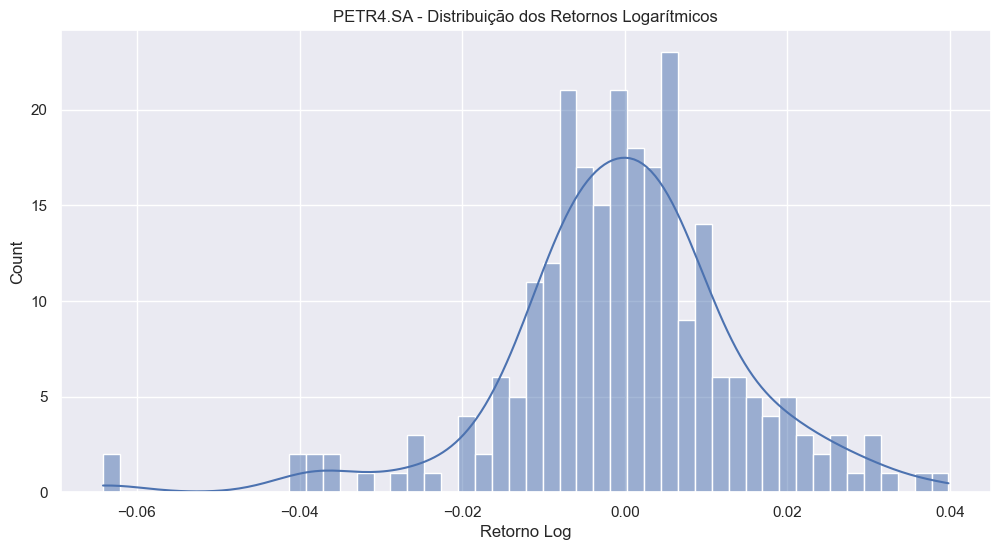

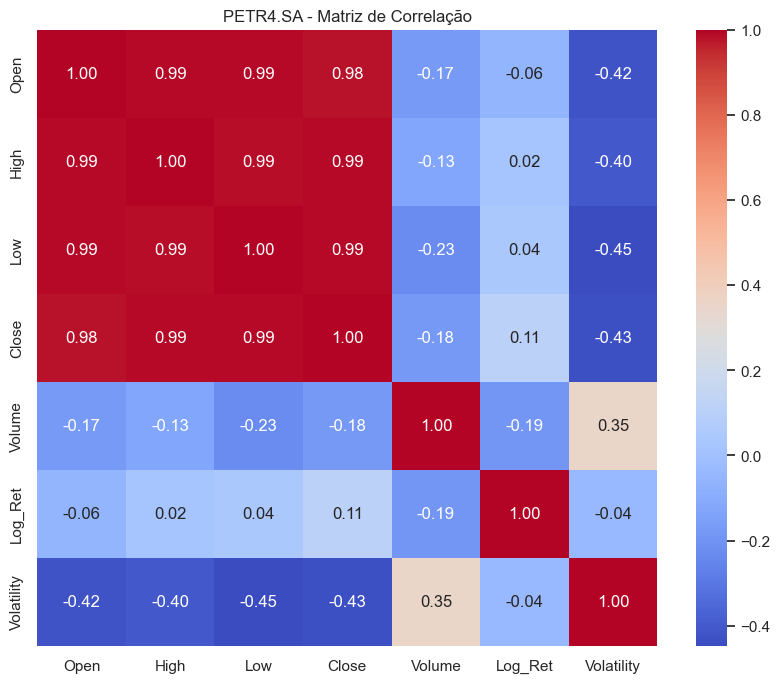


Analisando Ticker: PRIO3.SA


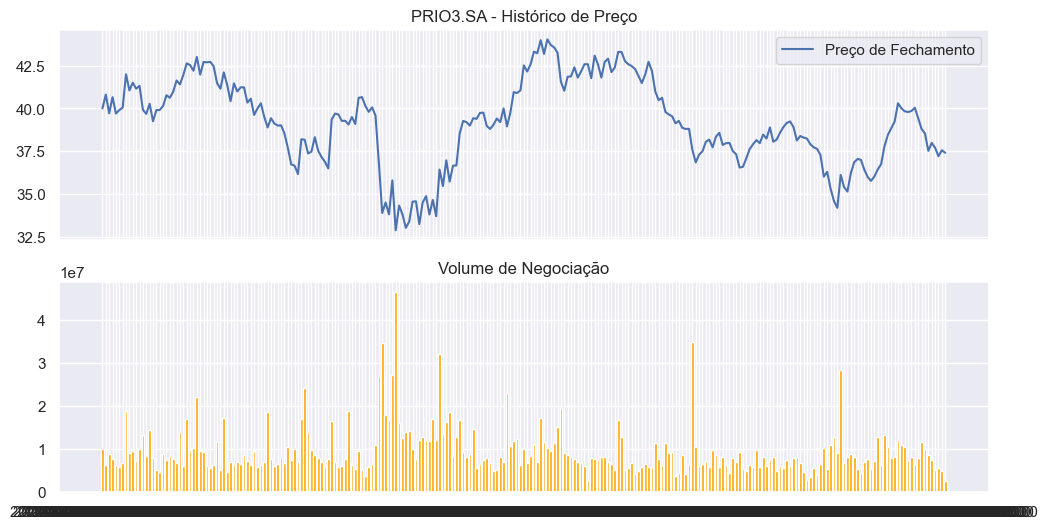

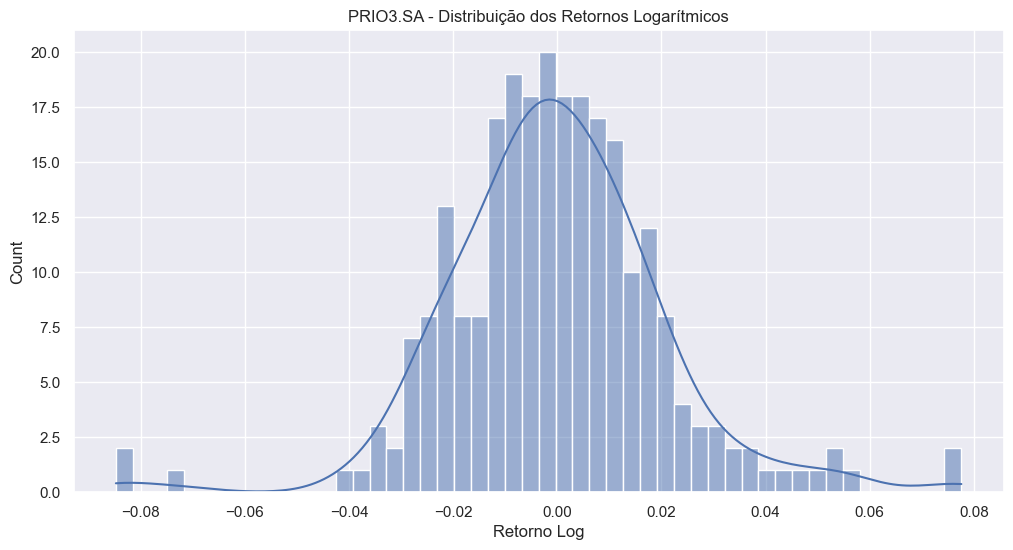

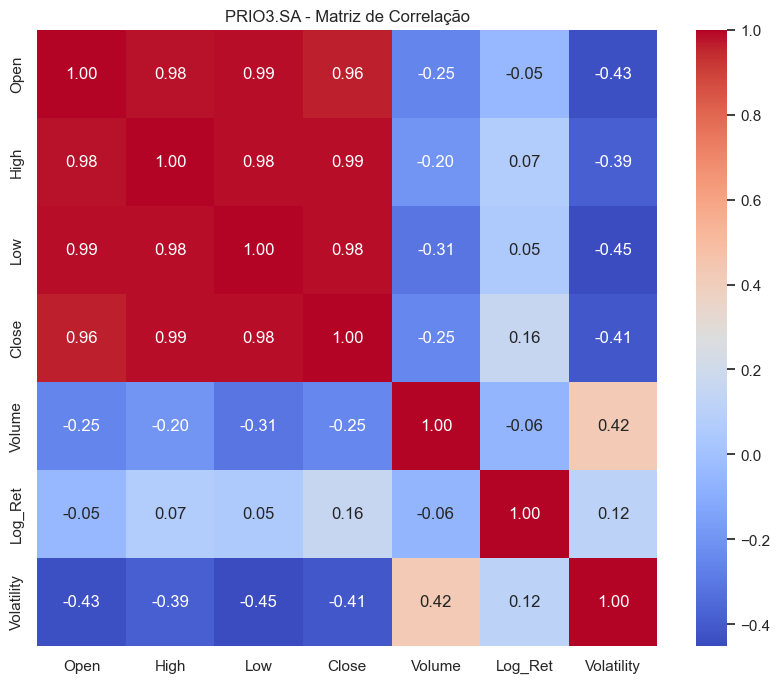


Analisando Ticker: RAIZ4.SA


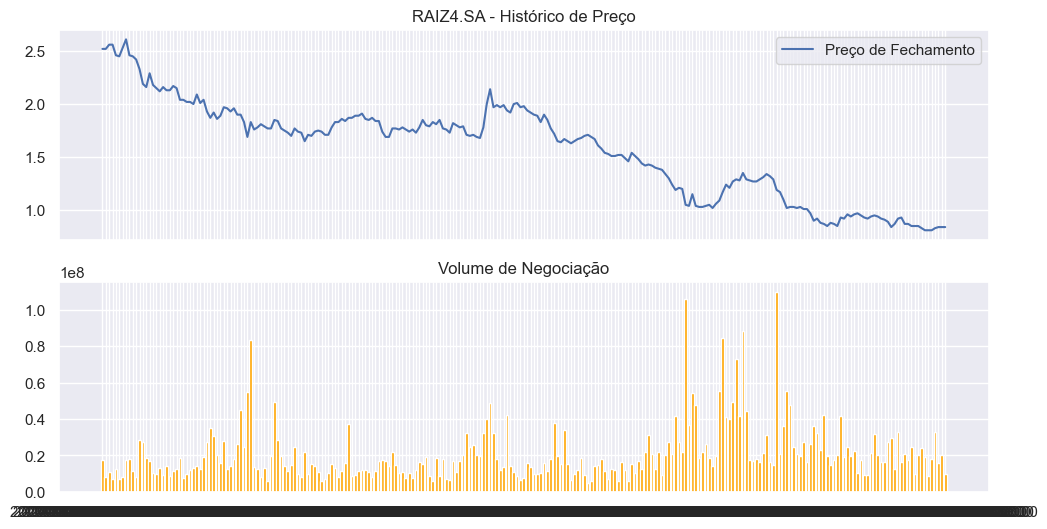

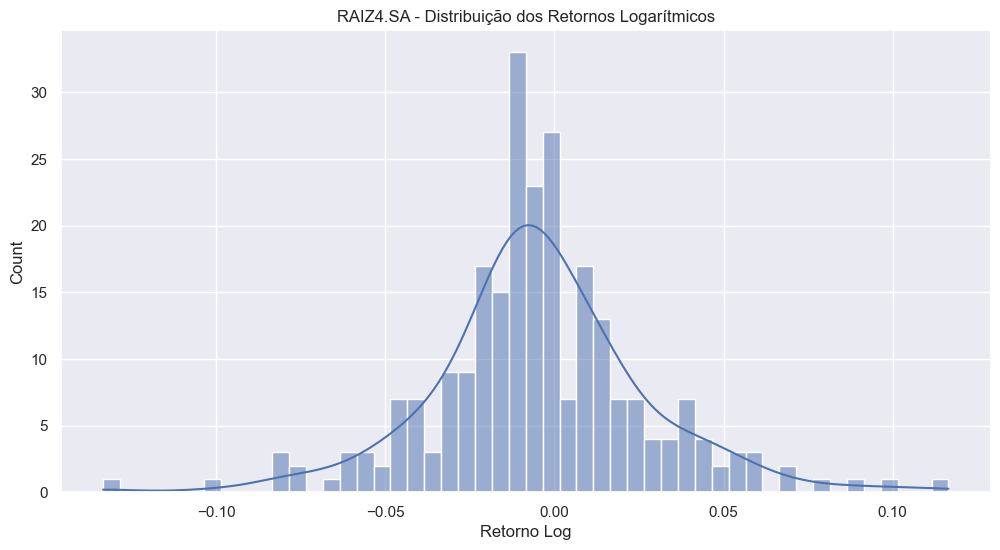

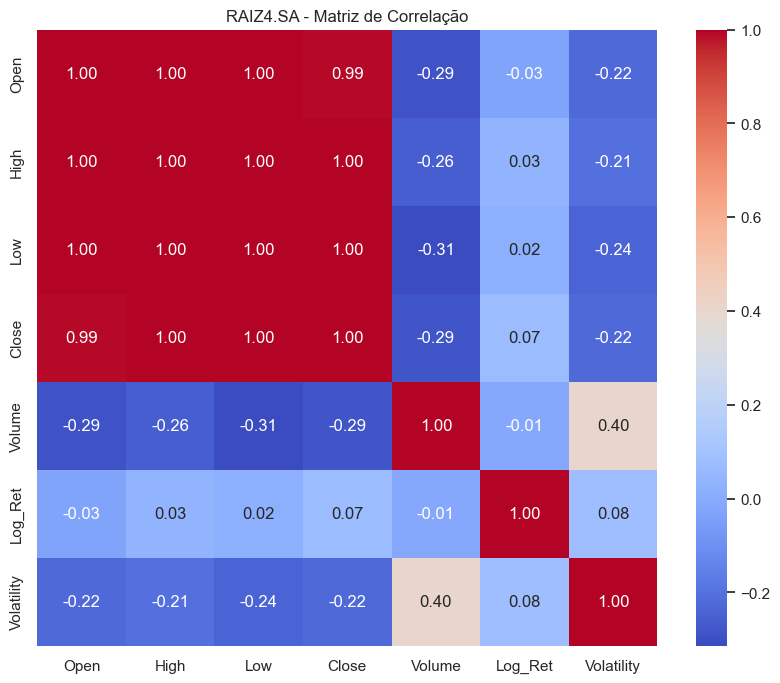


Analisando Ticker: RECV3.SA


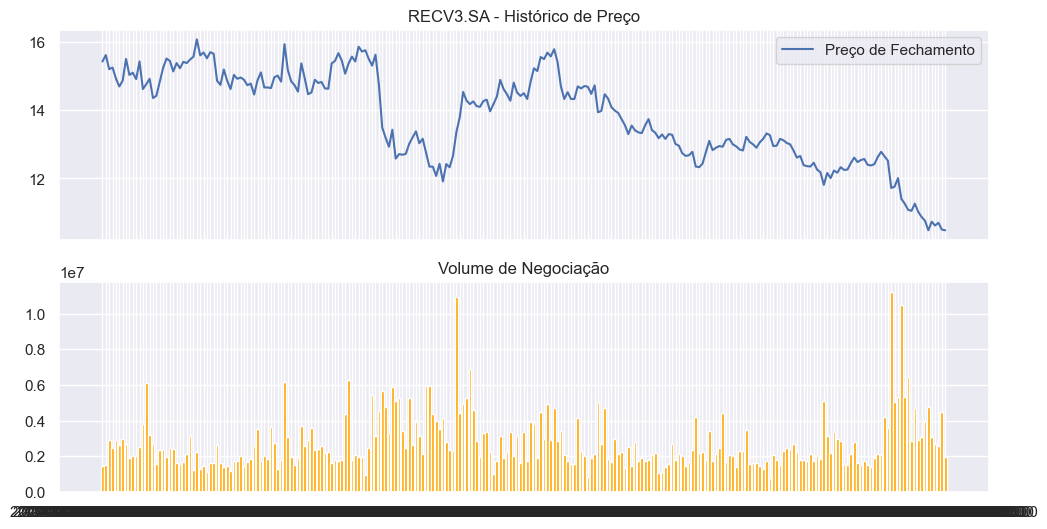

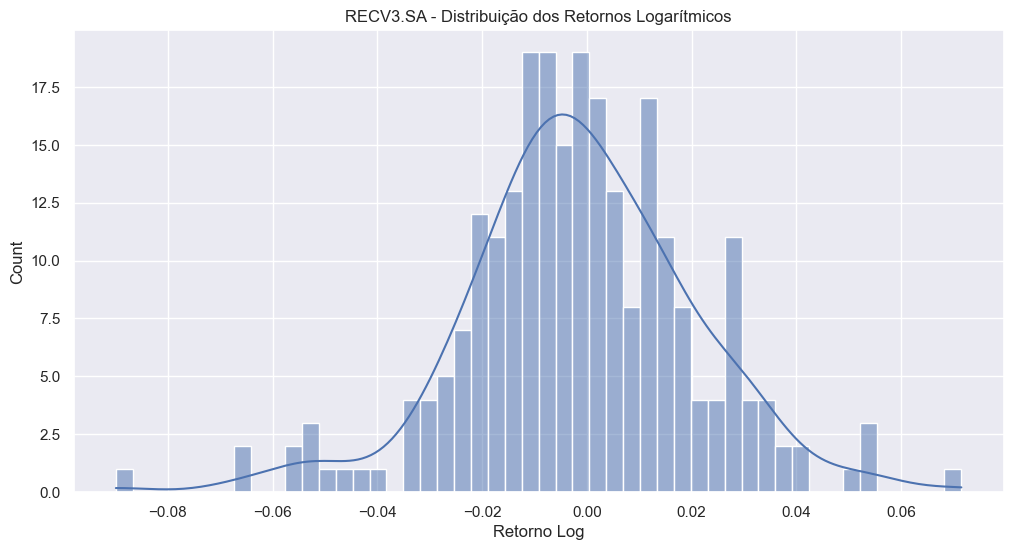

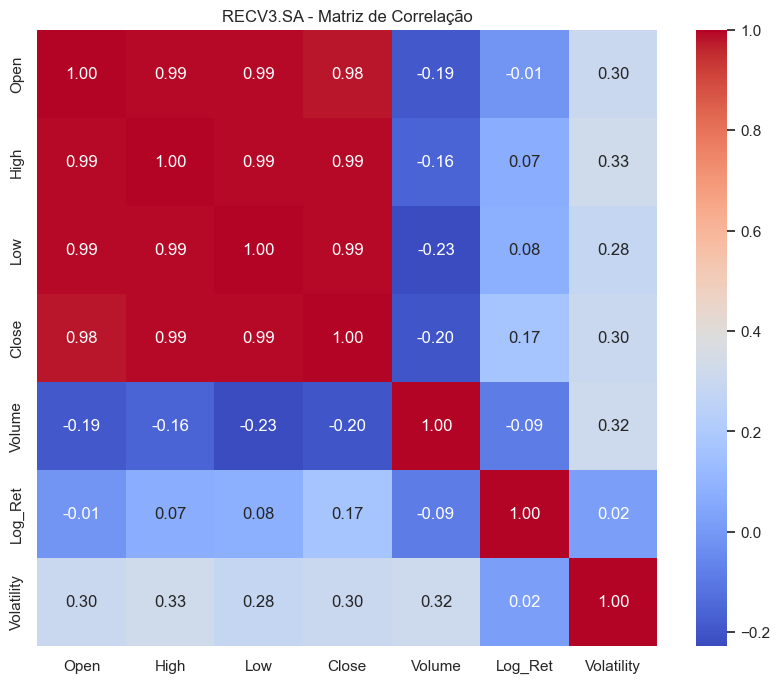


Analisando Ticker: TAEE11.SA


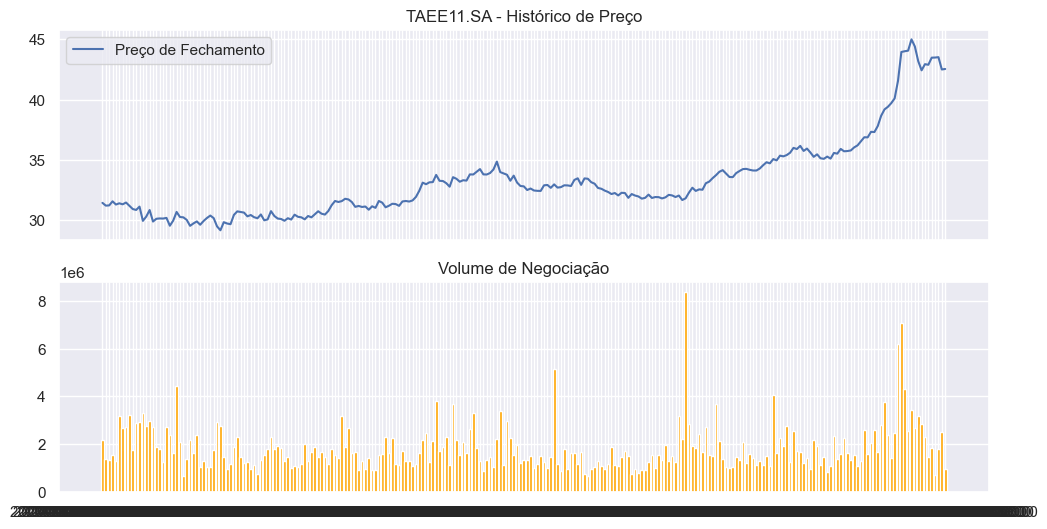

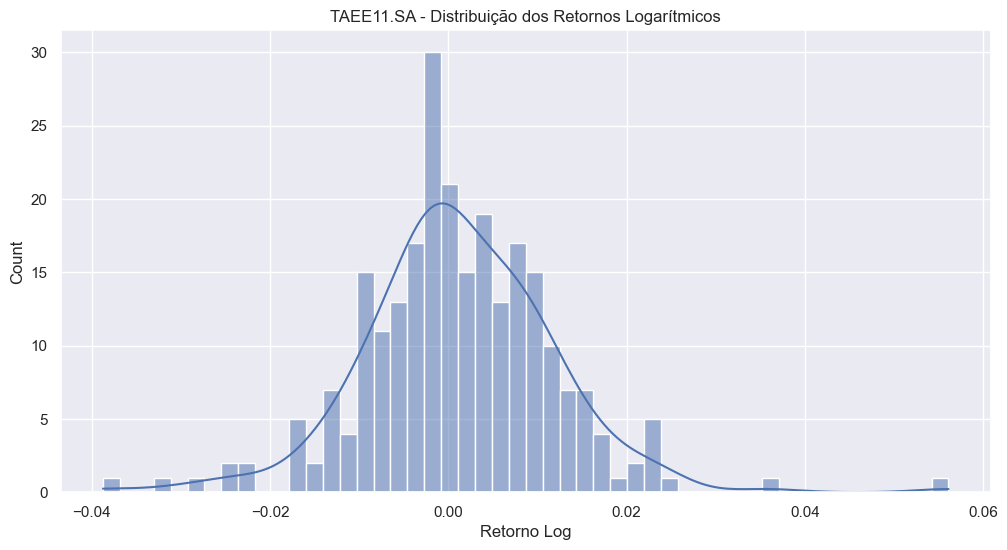

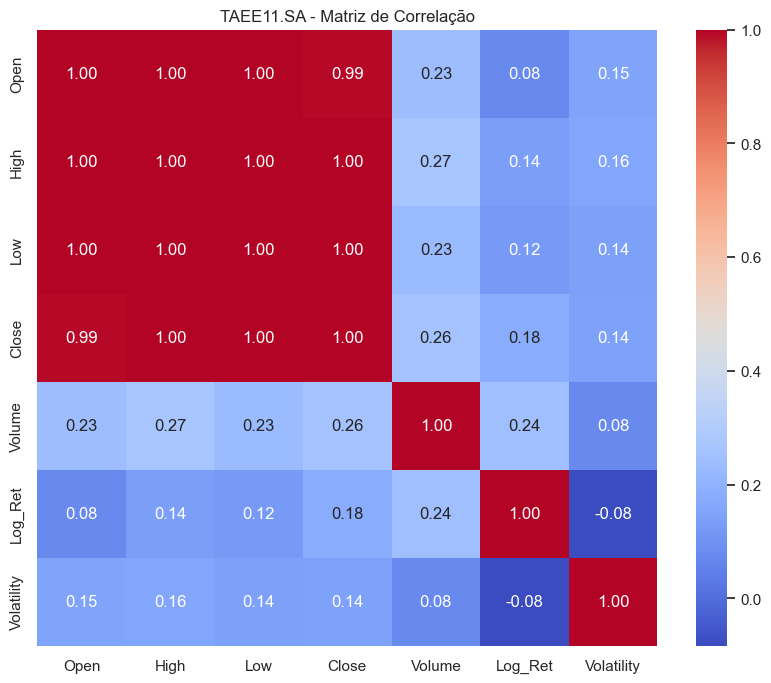


Analisando Ticker: VBBR3.SA


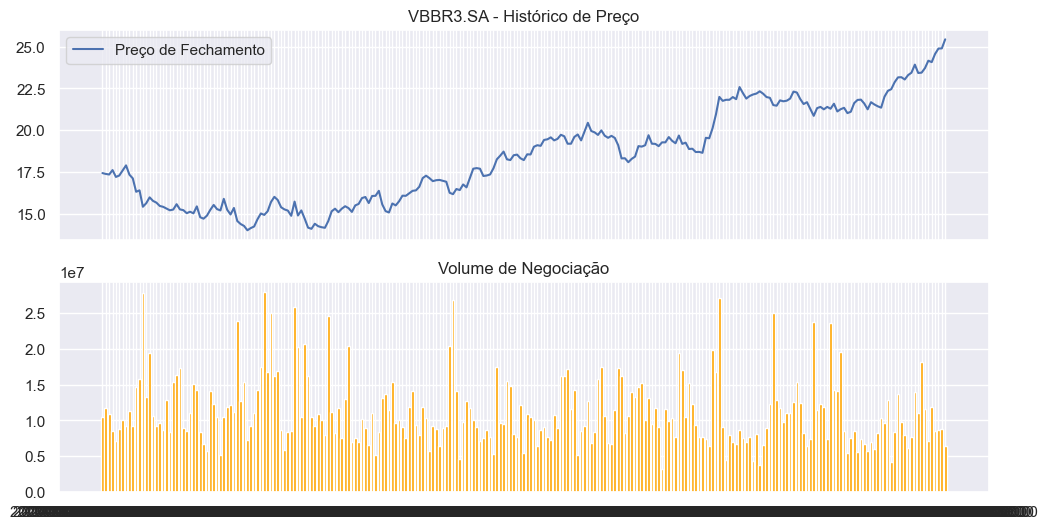

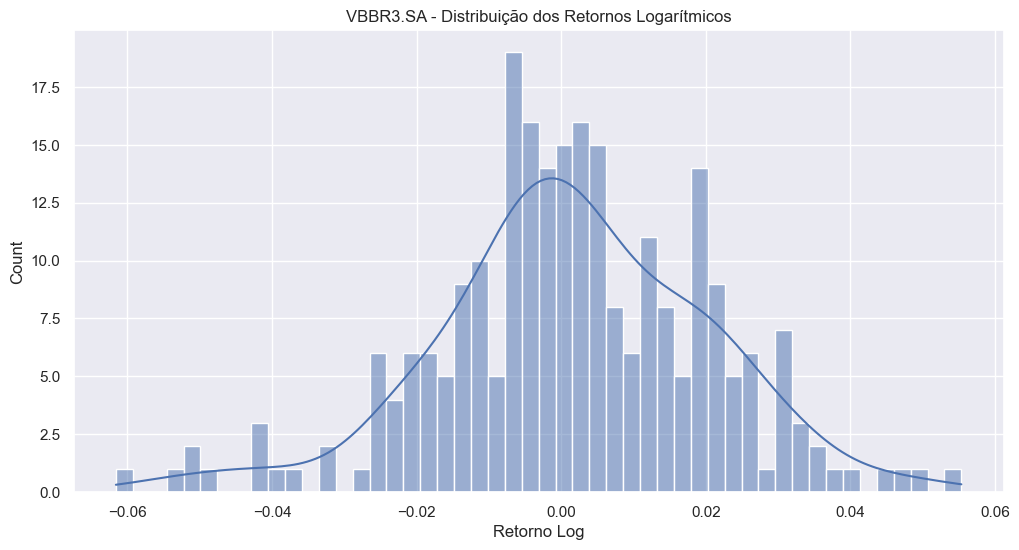

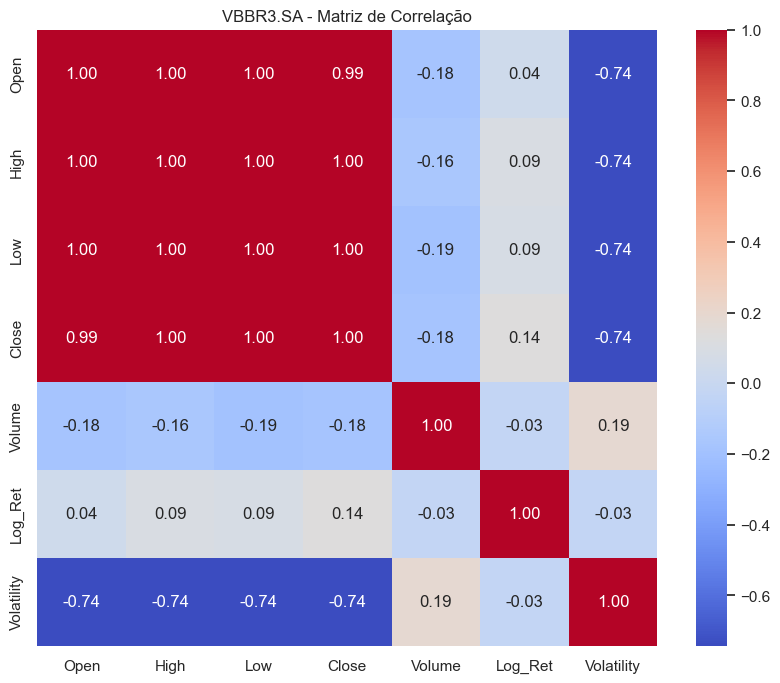

In [22]:
# Configurações de plotagem
plt.rcParams["figure.figsize"] = (12, 6)

# Lista de tickers únicos
tickers = df['Ticker'].unique()

# Loop de Análise por Ticker
for ticker in tickers: # Adicione o [:1] para ver um Ticker especifico
    print(f"\nAnalisando Ticker: {ticker}")
    df_t = df[df['Ticker'] == ticker].copy()
    
    # --- Visualização de Preço e Volume ---
    fig, ax = plt.subplots(2, 1, sharex=True)
    ax[0].plot(df_t['Date'], df_t['Close'], label='Preço de Fechamento')
    ax[0].set_title(f'{ticker} - Histórico de Preço')
    ax[0].legend()
    
    ax[1].bar(df_t['Date'], df_t['Volume'], color='orange', label='Volume')
    ax[1].set_title('Volume de Negociação')
    plt.show()
    
    # --- Engenharia de Features para Deep Learning ---
    # Retornos Logarítmicos (Melhor para DL que retornos simples)
    df_t['Log_Ret'] = np.log(df_t['Close'] / df_t['Close'].shift(1))
    
    # Volatilidade (Janela de 21 dias - ~1 mês útil)
    df_t['Volatility'] = df_t['Log_Ret'].rolling(window=21).std()
    
    # --- Distribuição dos Retornos (Normalidade) ---
    plt.figure()
    sns.histplot(df_t['Log_Ret'].dropna(), bins=50, kde=True)
    plt.title(f'{ticker} - Distribuição dos Retornos Logarítmicos')
    plt.xlabel('Retorno Log')
    plt.show()
    
    # --- Matriz de Correlação ---
    # Verifica correlação entre as features brutas
    cols_corr = ['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Ret', 'Volatility']
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_t[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'{ticker} - Matriz de Correlação')
    plt.show()

### Indetificação de outliers

Aqui estamos analisando o limite inferior e superior de todo conjunto de dados

In [24]:
q1 = np.percentile(df['Close'], 25)
q3 = np.percentile(df['Close'], 75)
iqr = q3 - q1


In [26]:
print(f"q1: {q1:.2f}, q3: {q3:.2f}, iqr: {iqr:.2f}")

q1: 11.01, q3: 34.17, iqr: 23.16


* Tudo que estiver fora do intervalor entre os limites **inferior** e **superior**, é considerado uma outliers.

In [27]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print(f"Limite Inferior: {limite_inferior:.2f}, Limite Superior: {limite_superior:.2f}")

Limite Inferior: -23.73, Limite Superior: 68.91


já aqui estamos verificando por ação quais são seus limites inferior e superior, e contando a quantidade de outliers que encontramos em seus conjuntos de dados.

In [32]:
for ticker in tickers:
    q1 = np.percentile(df[df['Ticker'] == ticker]['Close'], 25)
    q3 = np.percentile(df[df['Ticker'] == ticker]['Close'], 75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    print(f"Ticker: {ticker} - Limite Inferior: {limite_inferior:.2f}, Limite Superior: {limite_superior:.2f}")
    
    outliers = np.where((df[df['Ticker'] == ticker]['Close'] < limite_inferior) | (df[df['Ticker'] == ticker]['Close'] > limite_superior))
    print(f"Outliers encontrados: {len(outliers[0])}\n - Valores: {outliers}")

Ticker: ALUP11.SA - Limite Inferior: 21.12, Limite Superior: 35.88
Outliers encontrados: 0
 - Valores: (array([], dtype=int64),)
Ticker: AURE3.SA - Limite Inferior: 5.13, Limite Superior: 13.59
Outliers encontrados: 0
 - Valores: (array([], dtype=int64),)
Ticker: AXIA3.SA - Limite Inferior: 22.47, Limite Superior: 56.36
Outliers encontrados: 18
 - Valores: (array([233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250]),)
Ticker: AXIA6.SA - Limite Inferior: 27.53, Limite Superior: 57.54
Outliers encontrados: 21
 - Valores: (array([230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250]),)
Ticker: BRAV3.SA - Limite Inferior: 13.85, Limite Superior: 24.15
Outliers encontrados: 14
 - Valores: (array([ 24,  25,  26,  27,  28,  29,  30,  32, 245, 246, 247, 248, 249,
       250]),)
Ticker: CMIG4.SA - Limite Inferior: 8.51, Limite Superior: 12.10
Outliers encontrados: 1
 - Valores: (array([236]),)